# RNAseq of Lgn and nod segregating double mutants
Alignment (HiSAT2) and counting (featureCounts) done in atmosphere<br>
Will use DESeq2 and other R packages to peek at DEG.

In [1]:
# tell R where to do this work
# navigate to your project directory

setwd(".")

# create a new directory for DESeq2 output
dir.create("DESeq2")

Warning message in dir.create("DESeq2"):
“'DESeq2' already exists”

In [2]:

# load the DESeq2 library -- with return error if not properly installed
library(DESeq2)


Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min


Attaching packag

In [3]:
# create a new variable that explains where our count data is
directory <- "./featureCounts_precalculated/"

# check the datafiles that are available is this directory
dir (directory)

[1] "dbl19_S46.counts.txt"         "dbl19_S46.counts.txt.summary"
  [3] "dbl28_S48.counts.txt"         "dbl28_S48.counts.txt.summary"
  [5] "dbl31_S41.counts.txt"         "dbl31_S41.counts.txt.summary"
  [7] "dbl50_S43.counts.txt"         "dbl50_S43.counts.txt.summary"
  [9] "dbl54_S44.counts.txt"         "dbl54_S44.counts.txt.summary"
 [11] "dbl56_S50.counts.txt"         "dbl56_S50.counts.txt.summary"
 [13] "dbl57_S52.counts.txt"         "dbl57_S52.counts.txt.summary"
 [15] "dbl65_S42.counts.txt"         "dbl65_S42.counts.txt.summary"
 [17] "dbl66_S49.counts.txt"         "dbl66_S49.counts.txt.summary"
 [19] "dbl70_S47.counts.txt"         "dbl70_S47.counts.txt.summary"
 [21] "dbl88_S51.counts.txt"         "dbl88_S51.counts.txt.summary"
 [23] "dbl89_S40.counts.txt"         "dbl89_S40.counts.txt.summary"
 [25] "dbl9_S45.counts.txt"          "dbl9_S45.counts.txt.summary" 
 [27] "lgn17_S35.counts.txt"         "lgn17_S35.counts.txt.summary"
 [29] "lgn21_S36.counts.txt"         "lgn21_S36.counts.txt.summary"
 [31] "lgn28_S37.counts.txt"         "lgn28_S37.counts.txt.summary"
 [33] "lgn3_S39.counts.txt"          "lgn3_S39.counts.txt.summary" 
 [35] "lgn33_S38.counts.txt"         "lgn33_S38.counts.txt.summary"
 [37] "lgn37_S33.counts.txt"         "lgn37_S33.counts.txt.summary"
 [39] "lgn39_S27.counts.txt"         "lgn39_S27.counts.txt.summary"
 [41] "lgn42_S34.counts.txt"         "lgn42_S34.counts.txt.summary"
 [43] "lgn46_S30.counts.txt"         "lgn46_S30.counts.txt.summary"
 [45] "lgn59_S28.counts.txt"         "lgn59_S28.counts.txt.summary"
 [47] "lgn72_S31.counts.txt"         "lgn72_S31.counts.txt.summary"
 [49] "lgn77_S29.counts.txt"         "lgn77_S29.counts.txt.summary"
 [51] "lgn8_S32.counts.txt"          "lgn8_S32.counts.txt.summary" 
 [53] "nod11_S24.counts.txt"         "nod11_S24.counts.txt.summary"
 [55] "nod14_S18.counts.txt"         "nod14_S18.counts.txt.summary"
 [57] "nod16_S15.counts.txt"         "nod16_S15.counts.txt.summary"
 [59] "nod2_S26.counts.txt"          "nod2_S26.counts.txt.summary" 
 [61] "nod30_S17.counts.txt"         "nod30_S17.counts.txt.summary"
 [63] "nod36_S21.counts.txt"         "nod36_S21.counts.txt.summary"
 [65] "nod43_S22.counts.txt"         "nod43_S22.counts.txt.summary"
 [67] "nod47_S23.counts.txt"         "nod47_S23.counts.txt.summary"
 [69] "nod48_S16.counts.txt"         "nod48_S16.counts.txt.summary"
 [71] "nod6_S20.counts.txt"          "nod6_S20.counts.txt.summary" 
 [73] "nod60_S19.counts.txt"         "nod60_S19.counts.txt.summary"
 [75] "nod61_S25.counts.txt"         "nod61_S25.counts.txt.summary"
 [77] "nod62_S14.counts.txt"         "nod62_S14.counts.txt.summary"
 [79] "WT10_S8.counts.txt"           "WT10_S8.counts.txt.summary"  
 [81] "WT13_S12.counts.txt"          "WT13_S12.counts.txt.summary" 
 [83] "WT18_S4.counts.txt"           "WT18_S4.counts.txt.summary"  
 [85] "WT24_S10.counts.txt"          "WT24_S10.counts.txt.summary" 
 [87] "WT25_S7.counts.txt"           "WT25_S7.counts.txt.summary"  
 [89] "WT38_S5.counts.txt"           "WT38_S5.counts.txt.summary"  
 [91] "WT41_S6.counts.txt"           "WT41_S6.counts.txt.summary"  
 [93] "WT55_S9.counts.txt"           "WT55_S9.counts.txt.summary"  
 [95] "WT58_S3.counts.txt"           "WT58_S3.counts.txt.summary"  
 [97] "WT78_S2.counts.txt"           "WT78_S2.counts.txt.summary"  
 [99] "WT93_S11.counts.txt"          "WT93_S11.counts.txt.summary" 
[101] "WT95_S13.counts.txt"          "WT95_S13.counts.txt.summary" 
[103] "WT97_S1.counts.txt"           "WT97_S1.counts.txt.summary"

## table of row info  
To conduct our statistical analysis,  
we will need to explain the factors related to each file.  
For your own experiments, make sure to keep this data organized and safe.  
Here is the information we will need:    

| filename             | genotype | Lgn | nod |
|----------------------|----------|-----|-----|
| dbl19_S46.counts.txt | dbl      | Lgn | nod |
| dbl28_S48.counts.txt | dbl      | Lgn | nod |
| dbl31_S41.counts.txt | dbl      | Lgn | nod |
| dbl50_S43.counts.txt | dbl      | Lgn | nod |
| dbl54_S44.counts.txt | dbl      | Lgn | nod |
| dbl56_S50.counts.txt | dbl      | Lgn | nod |
| dbl57_S52.counts.txt | dbl      | Lgn | nod |
| dbl65_S42.counts.txt | dbl      | Lgn | nod |
| dbl66_S49.counts.txt | dbl      | Lgn | nod |
| dbl70_S47.counts.txt | dbl      | Lgn | nod |
| dbl88_S51.counts.txt | dbl      | Lgn | nod |
| dbl89_S40.counts.txt | dbl      | Lgn | nod |
| dbl9_S45.counts.txt  | dbl      | Lgn | nod |
| lgn17_S35.counts.txt | Lgn      | Lgn | WT  |
| lgn21_S36.counts.txt | Lgn      | Lgn | WT  |
| lgn28_S37.counts.txt | Lgn      | Lgn | WT  |
| lgn3_S39.counts.txt  | Lgn      | Lgn | WT  |
| lgn33_S38.counts.txt | Lgn      | Lgn | WT  |
| lgn37_S33.counts.txt | Lgn      | Lgn | WT  |
| lgn39_S27.counts.txt | Lgn      | Lgn | WT  |
| lgn42_S34.counts.txt | Lgn      | Lgn | WT  |
| lgn46_S30.counts.txt | Lgn      | Lgn | WT  |
| lgn59_S28.counts.txt | Lgn      | Lgn | WT  |
| lgn72_S31.counts.txt | Lgn      | Lgn | WT  |
| lgn77_S29.counts.txt | Lgn      | Lgn | WT  |
| lgn8_S32.counts.txt  | Lgn      | Lgn | WT  |
| nod11_S24.counts.txt | nod      | WT  | nod |
| nod14_S18.counts.txt | nod      | WT  | nod |
| nod16_S15.counts.txt | nod      | WT  | nod |
| nod2_S26.counts.txt  | nod      | WT  | nod |
| nod30_S17.counts.txt | nod      | WT  | nod |
| nod36_S21.counts.txt | nod      | WT  | nod |
| nod43_S22.counts.txt | nod      | WT  | nod |
| nod47_S23.counts.txt | nod      | WT  | nod |
| nod48_S16.counts.txt | nod      | WT  | nod |
| nod6_S20.counts.txt  | nod      | WT  | nod |
| nod60_S19.counts.txt | nod      | WT  | nod |
| nod61_S25.counts.txt | nod      | WT  | nod |
| nod62_S14.counts.txt | nod      | WT  | nod |
| WT10_S8.counts.txt   | WT       | WT  | WT  |
| WT13_S12.counts.txt  | WT       | WT  | WT  |
| WT18_S4.counts.txt   | WT       | WT  | WT  |
| WT24_S10.counts.txt  | WT       | WT  | WT  |
| WT25_S7.counts.txt   | WT       | WT  | WT  |
| WT38_S5.counts.txt   | WT       | WT  | WT  |
| WT41_S6.counts.txt   | WT       | WT  | WT  |
| WT55_S9.counts.txt   | WT       | WT  | WT  |
| WT58_S3.counts.txt   | WT       | WT  | WT  |
| WT78_S2.counts.txt   | WT       | WT  | WT  |
| WT93_S11.counts.txt  | WT       | WT  | WT  |
| WT95_S13.counts.txt  | WT       | WT  | WT  |
| WT97_S1.counts.txt   | WT       | WT  | WT  |

In [4]:
# Import table info using read.table command
# sample factors are saved in a dataframe called sampleTable

# Note: We could save this info as a text file and import from that file,
# but I am using the direct text import because it is easy to read
sampleTable <- read.table(text="filename	genotype	Lgn	nod
dbl19_S46.counts.txt	dbl	Lgn	nod
dbl28_S48.counts.txt	dbl	Lgn	nod
dbl31_S41.counts.txt	dbl	Lgn	nod
dbl50_S43.counts.txt	dbl	Lgn	nod
dbl54_S44.counts.txt	dbl	Lgn	nod
dbl56_S50.counts.txt	dbl	Lgn	nod
dbl57_S52.counts.txt	dbl	Lgn	nod
dbl65_S42.counts.txt	dbl	Lgn	nod
dbl66_S49.counts.txt	dbl	Lgn	nod
dbl70_S47.counts.txt	dbl	Lgn	nod
dbl88_S51.counts.txt	dbl	Lgn	nod
dbl89_S40.counts.txt	dbl	Lgn	nod
dbl9_S45.counts.txt	dbl	Lgn	nod
lgn17_S35.counts.txt	Lgn	Lgn	WT
lgn21_S36.counts.txt	Lgn	Lgn	WT
lgn28_S37.counts.txt	Lgn	Lgn	WT
lgn3_S39.counts.txt	Lgn	Lgn	WT
lgn33_S38.counts.txt	Lgn	Lgn	WT
lgn37_S33.counts.txt	Lgn	Lgn	WT
lgn39_S27.counts.txt	Lgn	Lgn	WT
lgn42_S34.counts.txt	Lgn	Lgn	WT
lgn46_S30.counts.txt	Lgn	Lgn	WT
lgn59_S28.counts.txt	Lgn	Lgn	WT
lgn72_S31.counts.txt	Lgn	Lgn	WT
lgn77_S29.counts.txt	Lgn	Lgn	WT
lgn8_S32.counts.txt	Lgn	Lgn	WT
nod11_S24.counts.txt	nod	WT	nod
nod14_S18.counts.txt	nod	WT	nod
nod16_S15.counts.txt	nod	WT	nod
nod2_S26.counts.txt	nod	WT	nod
nod30_S17.counts.txt	nod	WT	nod
nod36_S21.counts.txt	nod	WT	nod
nod43_S22.counts.txt	nod	WT	nod
nod47_S23.counts.txt	nod	WT	nod
nod48_S16.counts.txt	nod	WT	nod
nod6_S20.counts.txt	nod	WT	nod
nod60_S19.counts.txt	nod	WT	nod
nod61_S25.counts.txt	nod	WT	nod
nod62_S14.counts.txt	nod	WT	nod
WT10_S8.counts.txt	WT	WT	WT
WT13_S12.counts.txt	WT	WT	WT
WT18_S4.counts.txt	WT	WT	WT
WT24_S10.counts.txt	WT	WT	WT
WT25_S7.counts.txt	WT	WT	WT
WT38_S5.counts.txt	WT	WT	WT
WT41_S6.counts.txt	WT	WT	WT
WT55_S9.counts.txt	WT	WT	WT
WT58_S3.counts.txt	WT	WT	WT
WT78_S2.counts.txt	WT	WT	WT
WT93_S11.counts.txt	WT	WT	WT
WT95_S13.counts.txt	WT	WT	WT
WT97_S1.counts.txt	WT	WT	WT
", sep="\t", header=T)

In [5]:
# R is good at comparing factors against a reference value
# in this case, our reference value is WT
# Here, we use relevel() to explicitly say that 'WT" is the reference

# relevel sampleTable
sampleTable$genotype <- relevel(sampleTable$genotype, "WT")
sampleTable$Lgn <- relevel(sampleTable$Lgn, "WT")
sampleTable$nod <- relevel(sampleTable$nod, "WT")


In [6]:
# tell us about sampleTable
summary(sampleTable)

                 filename  genotype  Lgn      nod    
 dbl19_S46.counts.txt: 1   WT :13   WT :26   WT :26  
 dbl28_S48.counts.txt: 1   dbl:13   Lgn:26   nod:26  
 dbl31_S41.counts.txt: 1   Lgn:13                    
 dbl50_S43.counts.txt: 1   nod:13                    
 dbl54_S44.counts.txt: 1                             
 dbl56_S50.counts.txt: 1                             
 (Other)             :46                             

## Import read count values  
Read counting softwares will produce tables with a slightly different format.  
Make sure to check out your output before calculating.  

In [7]:
# create file name and path lists to find our files
# uses the directory variable defined above
file_names <- list.files(path=directory, pattern = "*.txt$") # create a list of all txt files in the "featureCounts" folder, $ means that it must end in '.txt"
file_paths <- list.files(path=directory, pattern = "*.txt$", full.names=T) # create a list of all txt files' full locations in the "featureCounts" folder

# read one file for the header and row name information
featureCounts <- read.table(file_paths[1], sep="\t", header=T) # start by reading the first file

# use cbind to add each column afterwards
counts <- cbind(featureCounts[,7]) # take the file's 7th column (RNA counts in featureCounts format)
rownames(counts) <- featureCounts[,1] # name by gene
colnames(counts) <- c(file_names[1]) # name the first column

head(counts) # check on the data
dim(featureCounts) # before -- raw table with many columns
dim(counts) # after -- just the count data

dbl19_S46.counts.txt
gene:GRMZM2G059865 1270                
gene:GRMZM5G888250   34                
gene:GRMZM2G093344   11                
gene:GRMZM2G093399    0                
gene:GRMZM5G809743   20                
gene:GRMZM5G833153   54

[1] 39625     7

[1] 39625     1

In [8]:
# "gene:GRMZM2G059865" how ugly! -- this is a leftover from the way our GFF was formated
# use the sub() function to cut out the "gene:" stuff

head( sub("gene:", "", rownames(counts)) ) #test that you can do it


[1] "GRMZM2G059865" "GRMZM5G888250" "GRMZM2G093344" "GRMZM2G093399"
[5] "GRMZM5G809743" "GRMZM5G833153"

In [9]:
#replace row names
rownames(counts) <- sub("gene:", "", rownames(counts))

head(counts)

dbl19_S46.counts.txt
GRMZM2G059865 1270                
GRMZM5G888250   34                
GRMZM2G093344   11                
GRMZM2G093399    0                
GRMZM5G809743   20                
GRMZM5G833153   54

In [10]:
# create a loop to add on all the count data
for (f in 2:length(file_paths)) { # loop over all the rest of the files
	new_featureCounts <- read.table(file_paths[f],sep="\t", header=T)
	print ("Merging file...")
	counts <- cbind(counts, new_featureCounts[,7]) # add on the new column
	colnames(counts) <- c(file_names[1:f]) # add on the new column's name
}

head(counts) # check on the data

[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Mergi

dbl19_S46.counts.txt dbl28_S48.counts.txt dbl31_S41.counts.txt
GRMZM2G059865 1270                 859                  739                 
GRMZM5G888250   34                  11                   16                 
GRMZM2G093344   11                  16                   13                 
GRMZM2G093399    0                   0                    0                 
GRMZM5G809743   20                  34                   20                 
GRMZM5G833153   54                  65                   59                 
              dbl50_S43.counts.txt dbl54_S44.counts.txt dbl56_S50.counts.txt
GRMZM2G059865 812                  613                  700                 
GRMZM5G888250  22                   10                   25                 
GRMZM2G093344  11                    4                    9                 
GRMZM2G093399   0                    0                    0                 
GRMZM5G809743  16                   17                   20                 
GRMZM5G833153  54                   53                   43                 
              dbl57_S52.counts.txt dbl65_S42.counts.txt dbl66_S49.counts.txt
GRMZM2G059865 730                  966                  773                 
GRMZM5G888250   8                   24                   30                 
GRMZM2G093344  13                   13                   15                 
GRMZM2G093399   0                    0                    0                 
GRMZM5G809743  15                   48                   28                 
GRMZM5G833153  42                   85                   58                 
              dbl70_S47.counts.txt ⋯ WT24_S10.counts.txt WT25_S7.counts.txt
GRMZM2G059865 935                  ⋯ 122                 724               
GRMZM5G888250  16                  ⋯   5                  27               
GRMZM2G093344  21                  ⋯   4                   8               
GRMZM2G093399   0                  ⋯   0                   0               
GRMZM5G809743  20                  ⋯  14                  13               
GRMZM5G833153  59                  ⋯  50                  43               
              WT38_S5.counts.txt WT41_S6.counts.txt WT55_S9.counts.txt
GRMZM2G059865 1042               953                960               
GRMZM5G888250   25                26                 16               
GRMZM2G093344   20                14                 16               
GRMZM2G093399    0                 2                  0               
GRMZM5G809743   21                11                 21               
GRMZM5G833153   78                32                 38               
              WT58_S3.counts.txt WT78_S2.counts.txt WT93_S11.counts.txt
GRMZM2G059865 780                1181               423                
GRMZM5G888250  24                  32                 6                
GRMZM2G093344   7                  27                 7                
GRMZM2G093399   0                   0                 0                
GRMZM5G809743   9                  28                65                
GRMZM5G833153  28                  57               180                
              WT95_S13.counts.txt WT97_S1.counts.txt
GRMZM2G059865 427                 561               
GRMZM5G888250  16                  17               
GRMZM2G093344   6                  10               
GRMZM2G093399   0                   0               
GRMZM5G809743  25                  42               
GRMZM5G833153  92                 127

## use DESeq2 to normalize and do some quality control  
DESeq2, like many packages uses a negative binomeal normalization method.  
We can also input our experimental design to try and adjust for confounding factors.  
We will use this method to also determine which genes are differentially expressed 

In [11]:
#create dds object using matrix import command
ddsMatrix <- DESeqDataSetFromMatrix(countData=counts, 
                              colData=sampleTable, 
                              design=~genotype)
ddsMatrix

class: DESeqDataSet 
dim: 39625 52 
metadata(1): version
assays(1): counts
rownames(39625): GRMZM2G059865 GRMZM5G888250 ... GRMZM6G036147
  GRMZM6G708185
rowData names(0):
colnames(52): dbl19_S46.counts.txt dbl28_S48.counts.txt ...
  WT95_S13.counts.txt WT97_S1.counts.txt
colData names(4): filename genotype Lgn nod

In [12]:
# Filtering by gene
# lets get rid of genes that are not expressed or very hard to detect in this dataset
# there are other ways of considering them
# but having many genes with a low count value will affect our normalization method
ddsMatrix <- ddsMatrix[ rowSums(counts(ddsMatrix, normalized=FALSE) >= 5) > 13, ] #only consider detected genes, >= 1 RPM in more than 13 replicates

In [13]:
#how has it changed
ddsMatrix

class: DESeqDataSet 
dim: 22490 52 
metadata(1): version
assays(1): counts
rownames(22490): GRMZM2G059865 GRMZM5G888250 ... GRMZM6G699895
  GRMZM6G708185
rowData names(0):
colnames(52): dbl19_S46.counts.txt dbl28_S48.counts.txt ...
  WT95_S13.counts.txt WT97_S1.counts.txt
colData names(4): filename genotype Lgn nod

In [14]:
#convert into DESeq object -- will estimate dispersion
dds <- DESeq (ddsMatrix)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 72 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


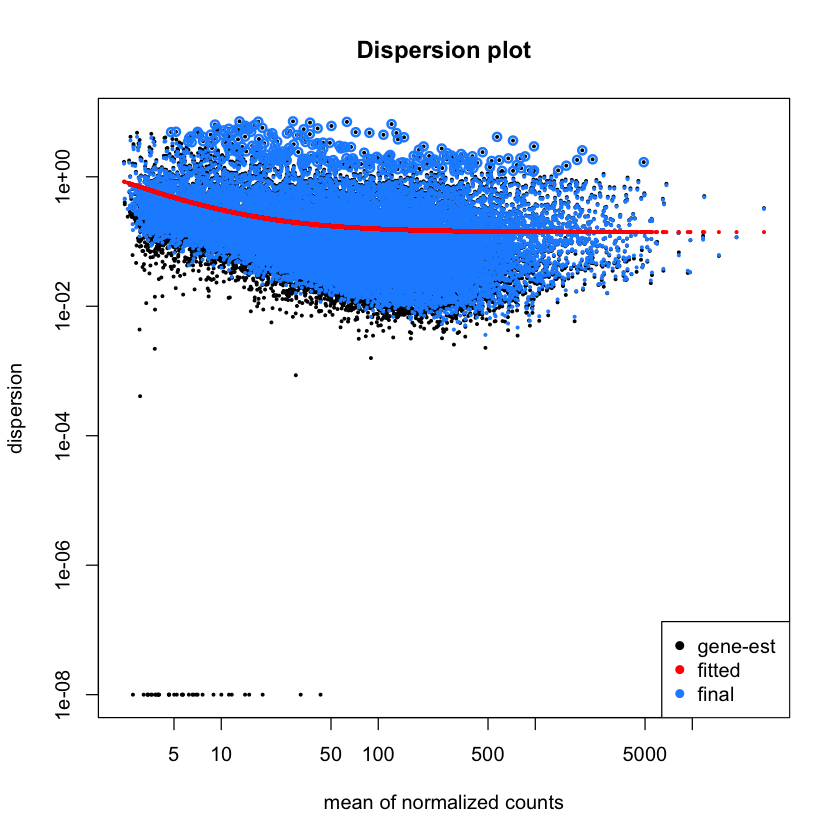

In [15]:
plotDispEsts(dds, main="Dispersion plot")

## some quick quality control  
We can use a PCA plot or other type of dimesional reduction method (MDS, tSNE, uMAP, etc)  
to take a quick look at patterns accross datasets.  

Ideally, your experimental design will be reflected in your PCA plot  
But you might find outliers or other confounding variables have impacted your data.  
Ex. If you are studying WT vs Mutant, a healthy datast will have two clusters  
one for the WT transcriptomes and one for the Mutant transcriptomes

In [16]:
#create variance stabilized table as internal norm
# vsd is good for quick comparisons between datasets 
# this method does not normalize by experimental factors
vsd <- varianceStabilizingTransformation(dds)

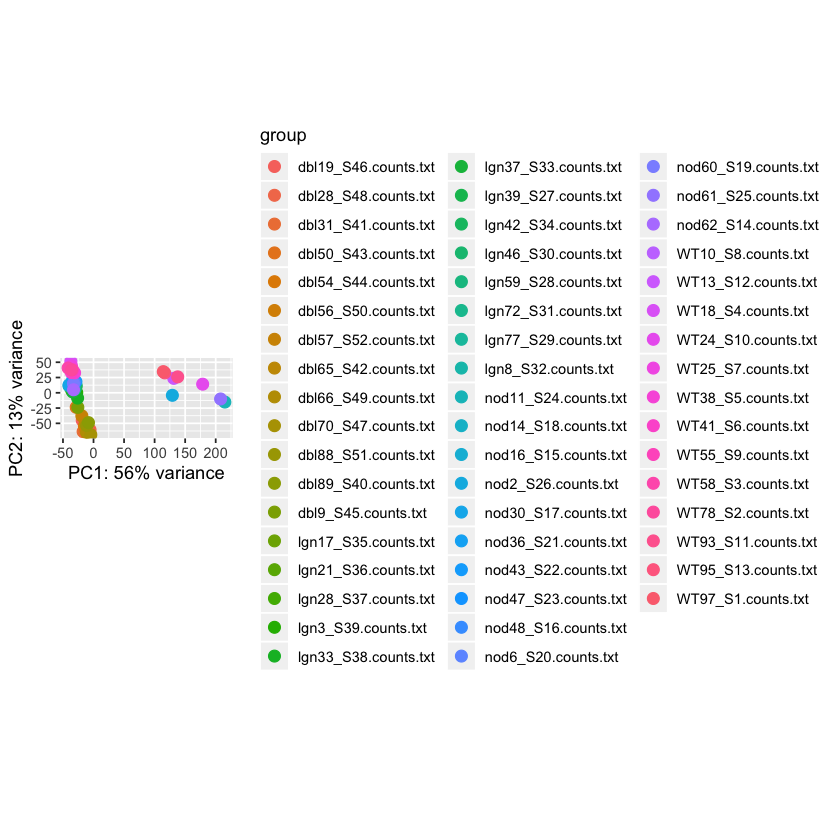

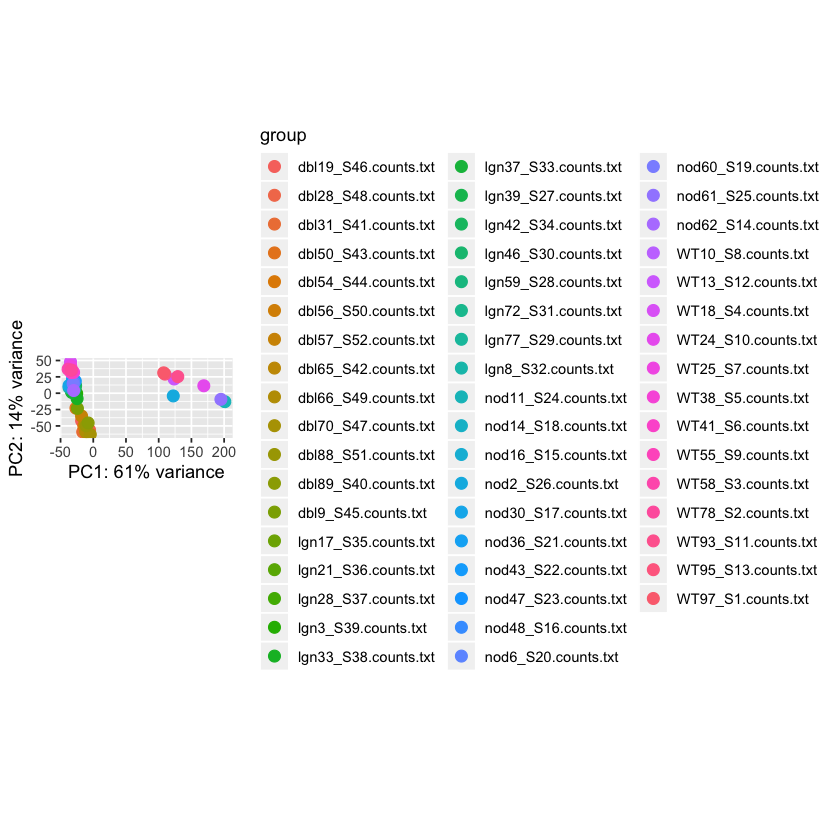

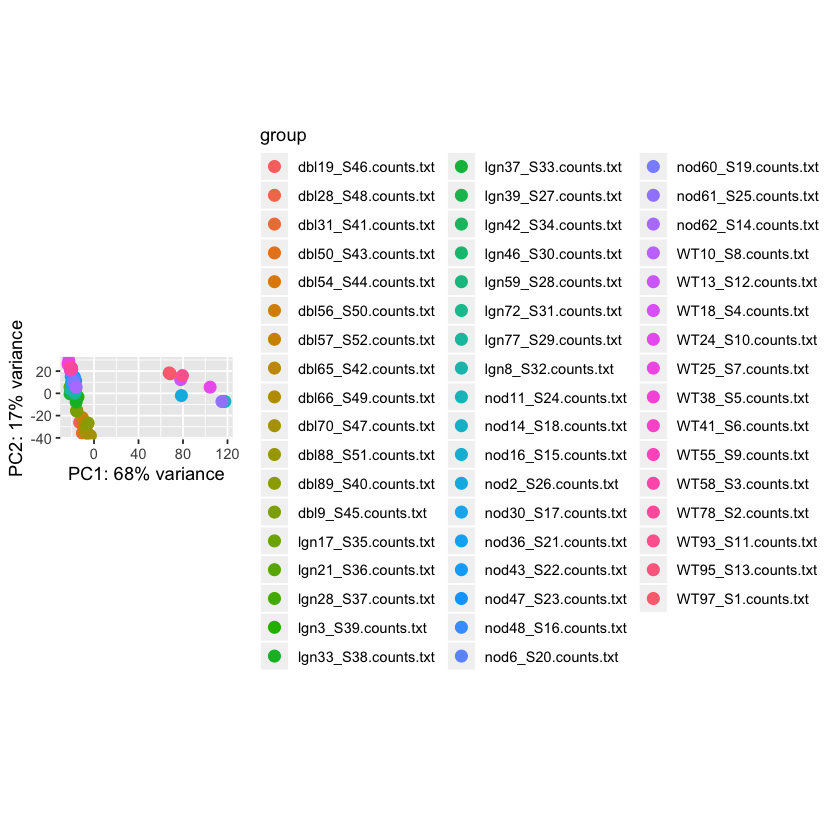

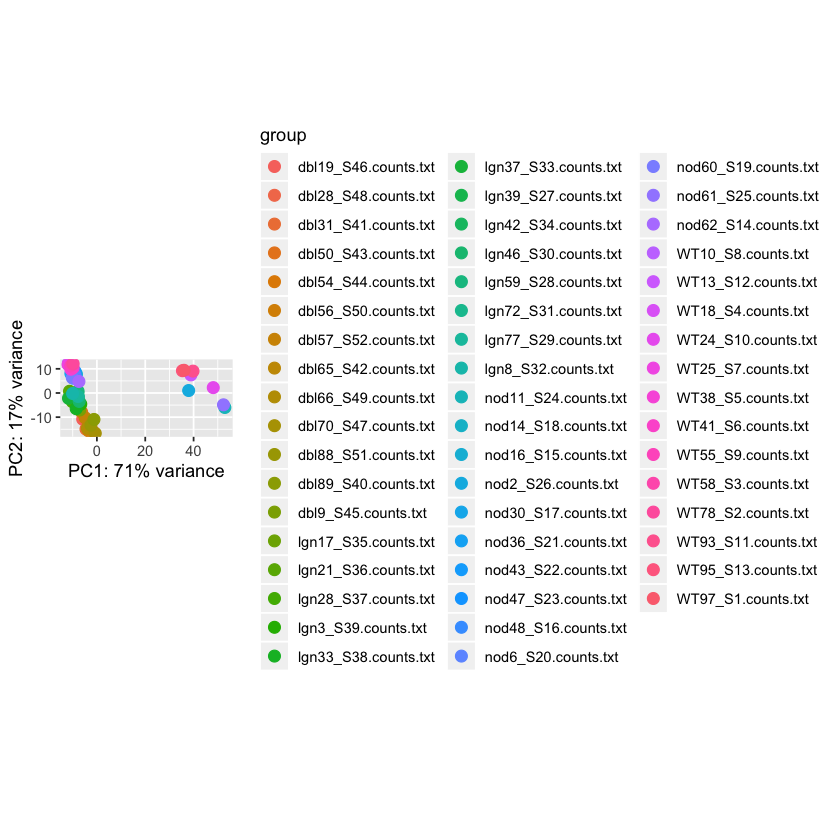

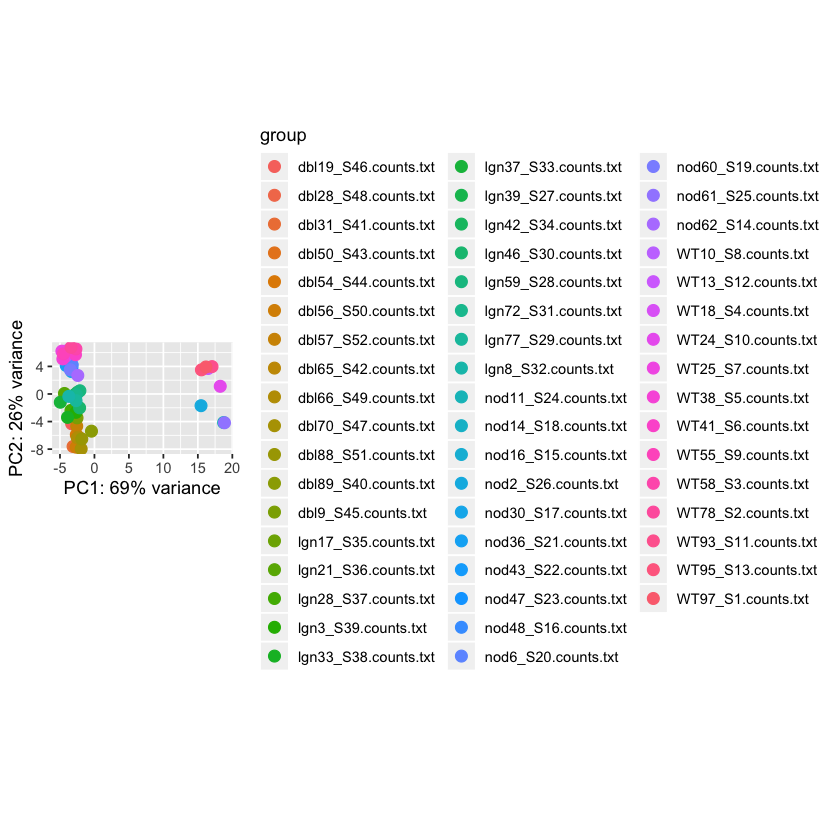

In [17]:
#check PCA plot at a few different levels
plotPCA(vsd, intgroup='filename', ntop=100000)
plotPCA(vsd, intgroup='filename', ntop=10000)
plotPCA(vsd, intgroup='filename', ntop=1000)
plotPCA(vsd, intgroup='filename', ntop=100)
plotPCA(vsd, intgroup='filename', ntop=10)

## are there other factors?  
Looks like there are two clusters...  
Most of the data in one nice gradient with a second, dissimilar lump  

### Recolor these plots to find if there are experimental factors  

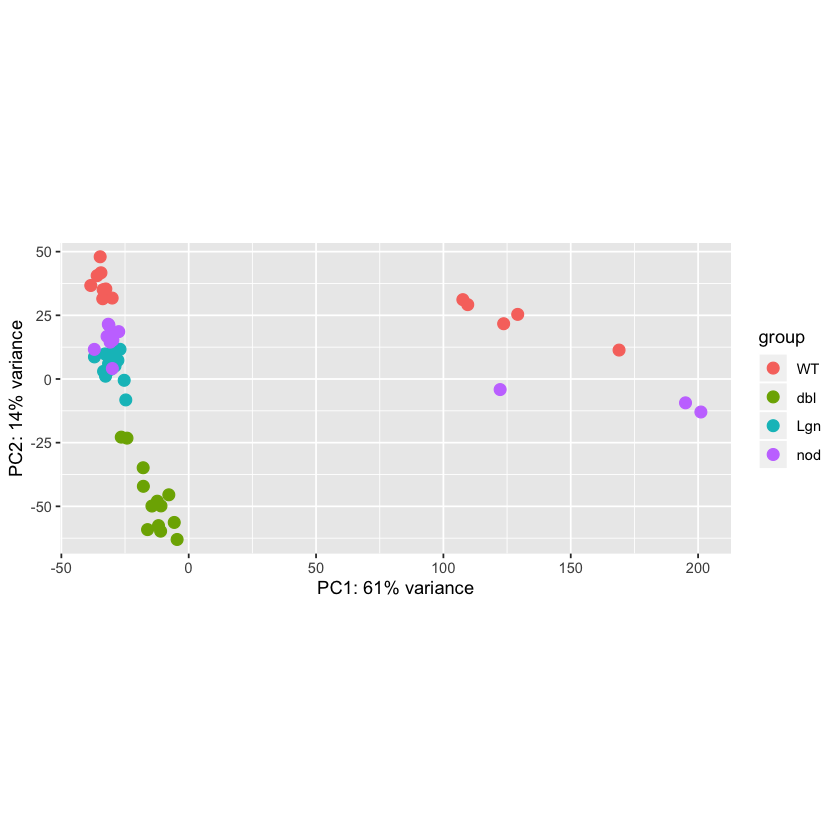

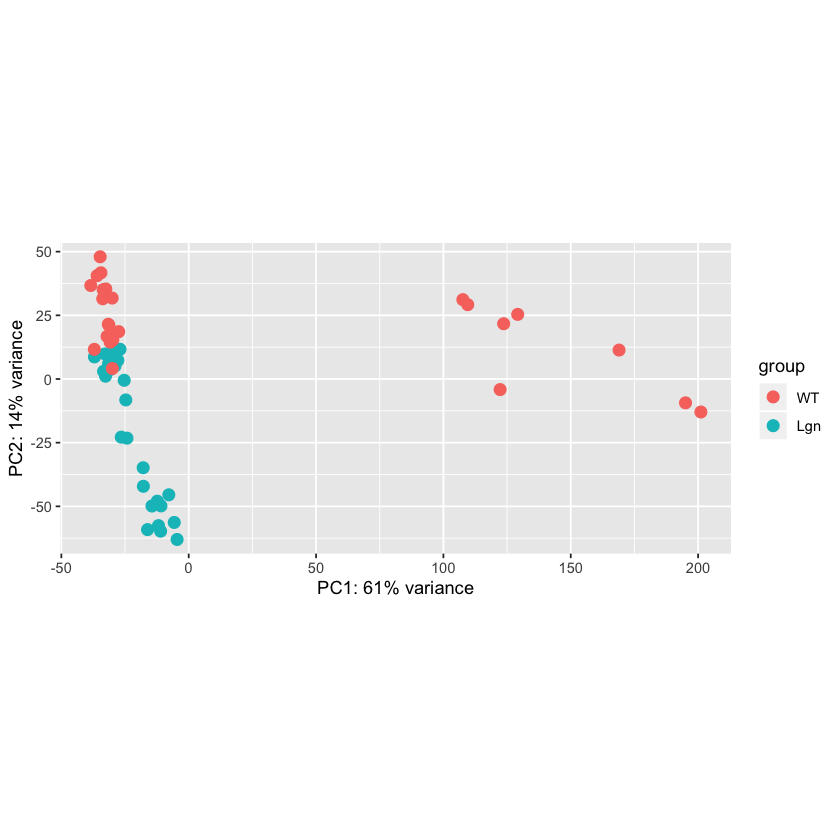

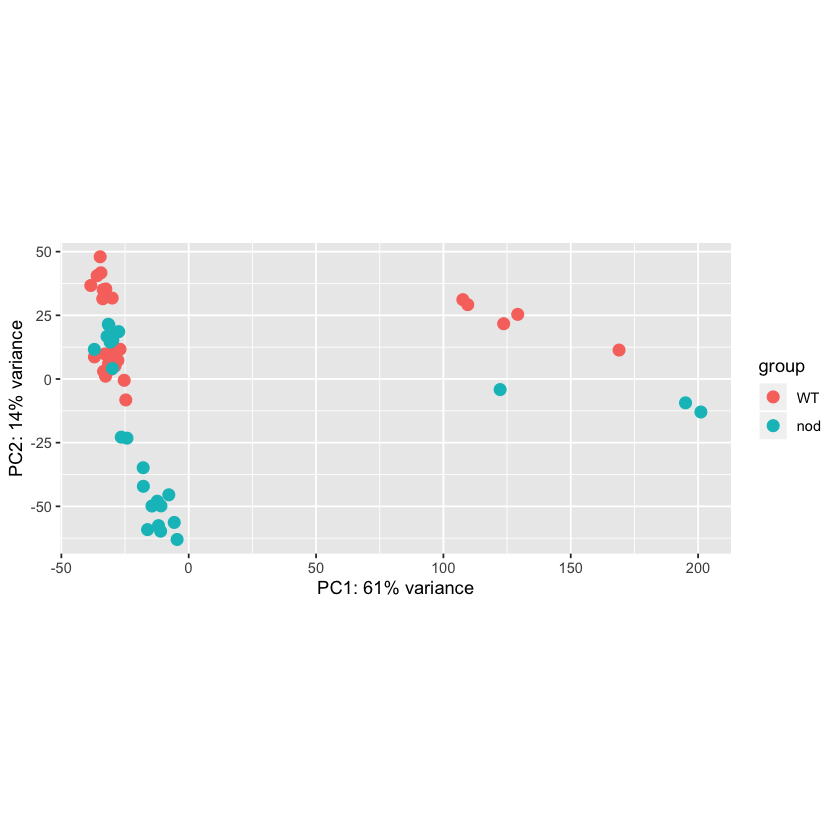

In [18]:
# Color by genotype
plotPCA(vsd, intgroup='genotype', ntop=10000)
plotPCA(vsd, intgroup='Lgn', ntop=10000)
plotPCA(vsd, intgroup='nod', ntop=10000)

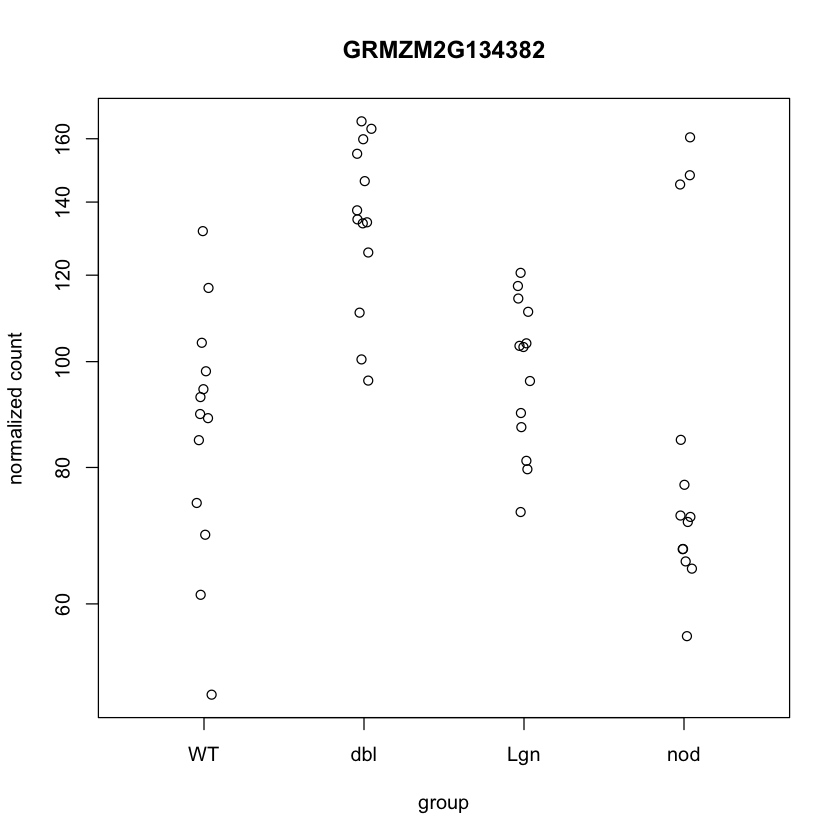

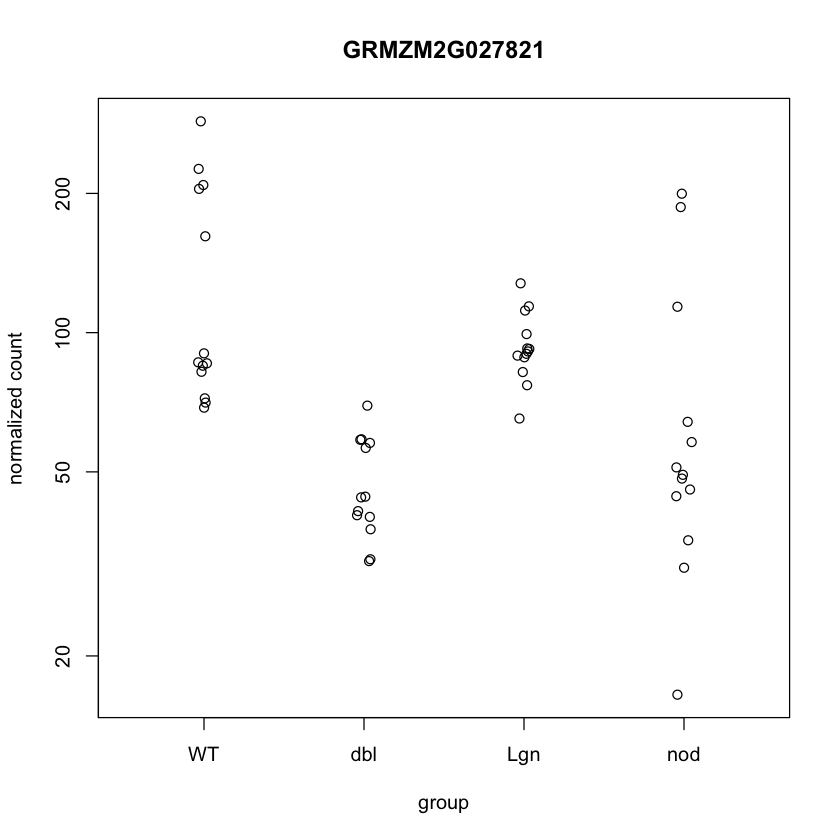

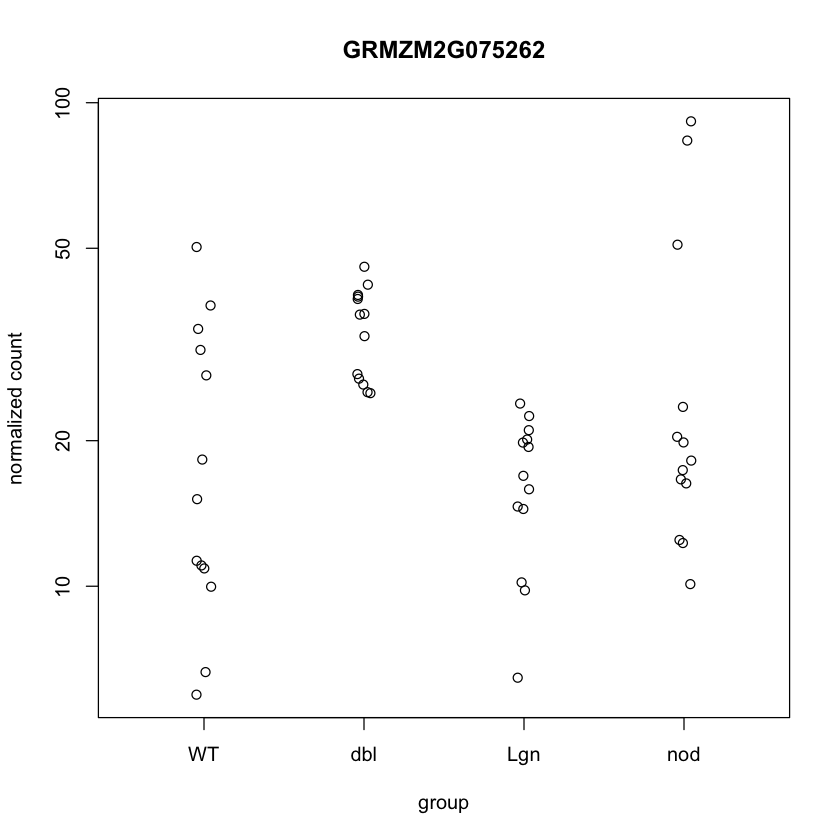

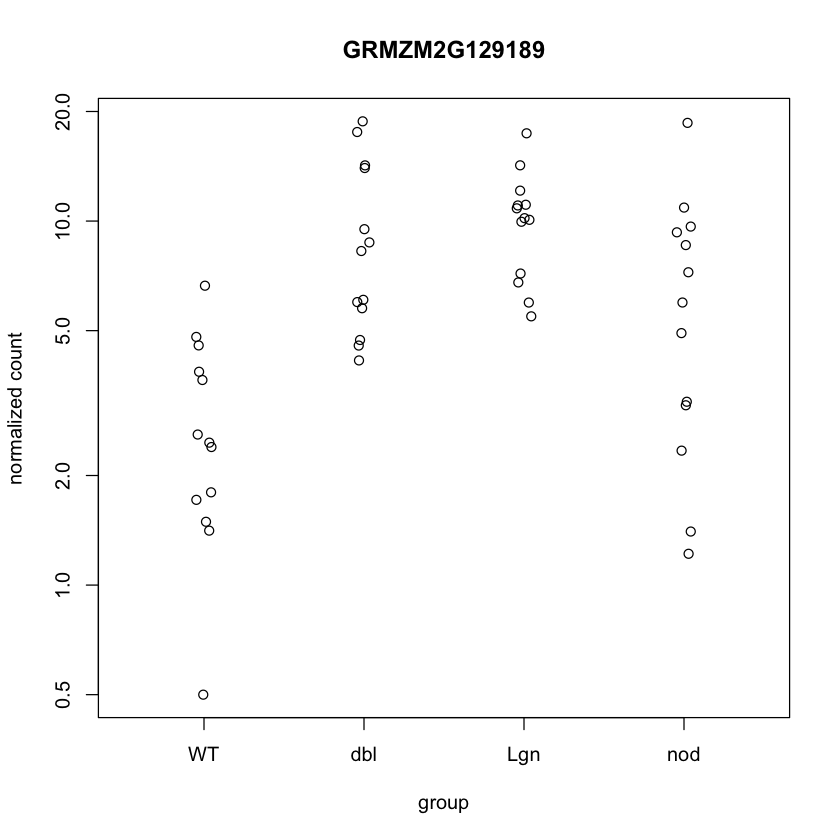

In [19]:
# what about the expression pattern of individual genes
# can we find outliers here?
# from the published literature: 
#  we expect low nod expression in the nod mutant
#  and high EcPR4 expression in the Lgn mutant
plotCounts(dds, gene="GRMZM2G134382", intgroup="genotype") #Lgn
plotCounts(dds, gene="GRMZM2G027821", intgroup="genotype") #nod
plotCounts(dds, gene="GRMZM2G075262", intgroup="genotype") #sol
plotCounts(dds, gene="GRMZM2G129189", intgroup="genotype") #EcPR4

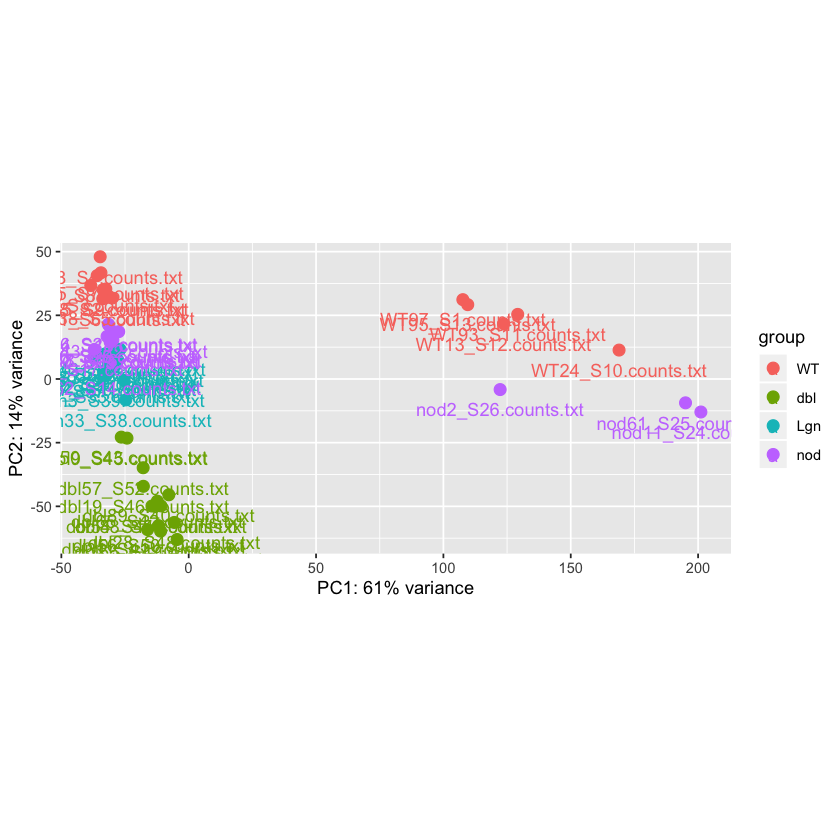

In [20]:
# identify outliers
# let's do some plotting to label those outliers on the PCA plot

# load a package called ggplot
library(ggplot2)

# plot PCA then add a layer from ggplot that has the name of the sample
plotPCA(vsd, intgroup='genotype', ntop=10000) + geom_text(aes(label=name),vjust=2)

In [21]:
#outliers are 
#nod11_S24.counts.txt
#nod2_S26.counts.txt
#nod61_S25.counts.txt
#WT13_S12.counts.txt
#WT24_S10.counts.txt
#WT95_S13.counts.txt
#WT97_S1.counts.txt

#you can use which to figure out which file index matches
# the number that returns can be used to quickly identify the column
which("nod11_S24.counts.txt" == colnames(dds))
which("nod2_S26.counts.txt" == colnames(dds))
which("nod61_S25.counts.txt" == colnames(dds))
which("WT13_S12.counts.txt" == colnames(dds))
which("WT24_S10.counts.txt" == colnames(dds))
which("WT95_S13.counts.txt" == colnames(dds))
which("WT97_S1.counts.txt" == colnames(dds))


[1] 27

[1] 30

[1] 38

[1] 41

[1] 43

[1] 51

[1] 52

In [22]:
# ok, we want to get rid of files 27,30,38,41,43,51,52
colnames(dds[,c(27,30,38,41,43,50,51,52)]) #check that the numbers have the right name

[1] "nod11_S24.counts.txt" "nod2_S26.counts.txt"  "nod61_S25.counts.txt"
[4] "WT13_S12.counts.txt"  "WT24_S10.counts.txt"  "WT93_S11.counts.txt" 
[7] "WT95_S13.counts.txt"  "WT97_S1.counts.txt"

In [23]:
# drop outliers and check quality again

dds_drop <- dds[,-c(27,30,38,41,43,50,51,52)] #use '-' to remove

In [24]:
# compare the original and the cleaned data
dds
dds_drop

class: DESeqDataSet 
dim: 22490 52 
metadata(1): version
assays(5): counts mu cooks replaceCounts replaceCooks
rownames(22490): GRMZM2G059865 GRMZM5G888250 ... GRMZM6G699895
  GRMZM6G708185
rowData names(30): baseMean baseVar ... maxCooks replace
colnames(52): dbl19_S46.counts.txt dbl28_S48.counts.txt ...
  WT95_S13.counts.txt WT97_S1.counts.txt
colData names(6): filename genotype ... sizeFactor replaceable

class: DESeqDataSet 
dim: 22490 44 
metadata(1): version
assays(5): counts mu cooks replaceCounts replaceCooks
rownames(22490): GRMZM2G059865 GRMZM5G888250 ... GRMZM6G699895
  GRMZM6G708185
rowData names(30): baseMean baseVar ... maxCooks replace
colnames(44): dbl19_S46.counts.txt dbl28_S48.counts.txt ...
  WT58_S3.counts.txt WT78_S2.counts.txt
colData names(6): filename genotype ... sizeFactor replaceable

## Have the outliers been removed?  
Perform the same quality control steps to check  
Look at a PCA. Is the pattern the same?  

In [25]:
#create variance stabilized table
vsd <- varianceStabilizingTransformation(dds_drop)

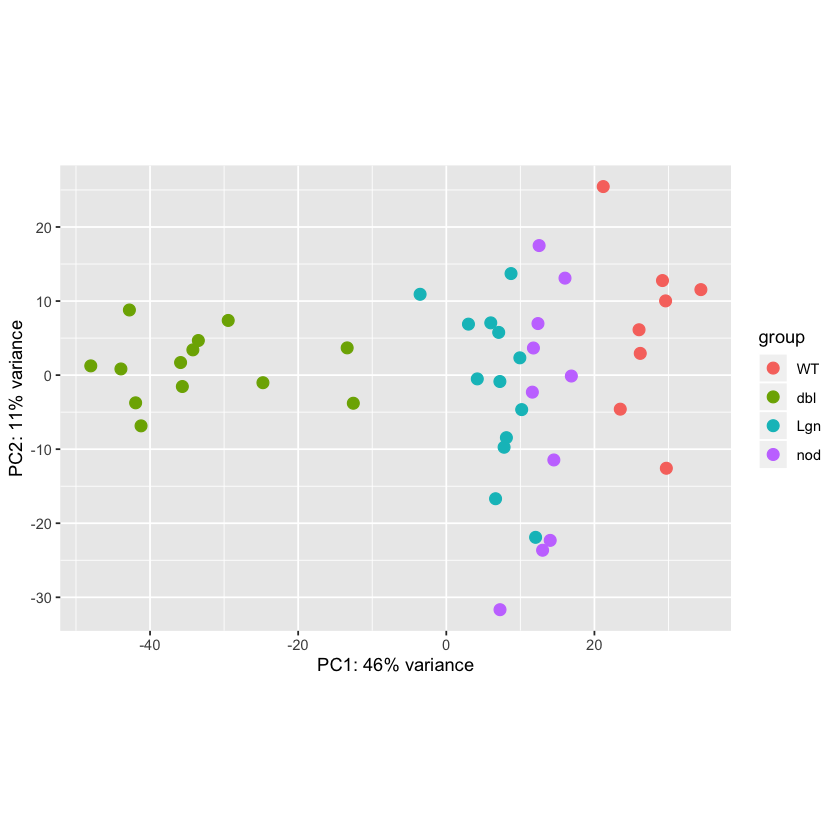

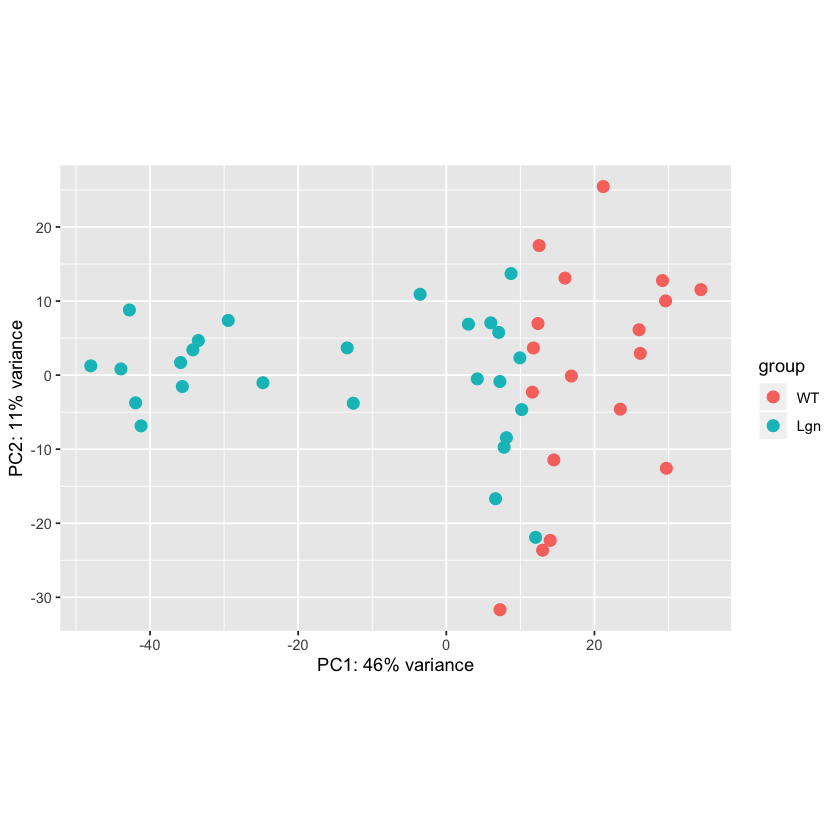

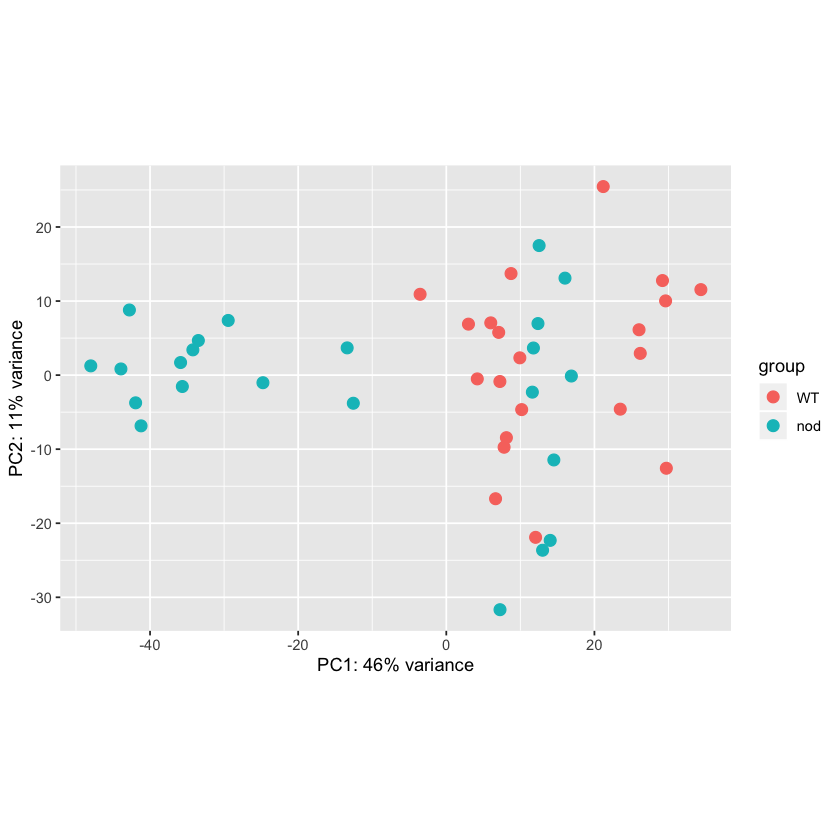

In [26]:
# check genotypes in PCA
plotPCA(vsd, intgroup='genotype', ntop=10000)
plotPCA(vsd, intgroup='Lgn', ntop=10000)
plotPCA(vsd, intgroup='nod', ntop=10000)

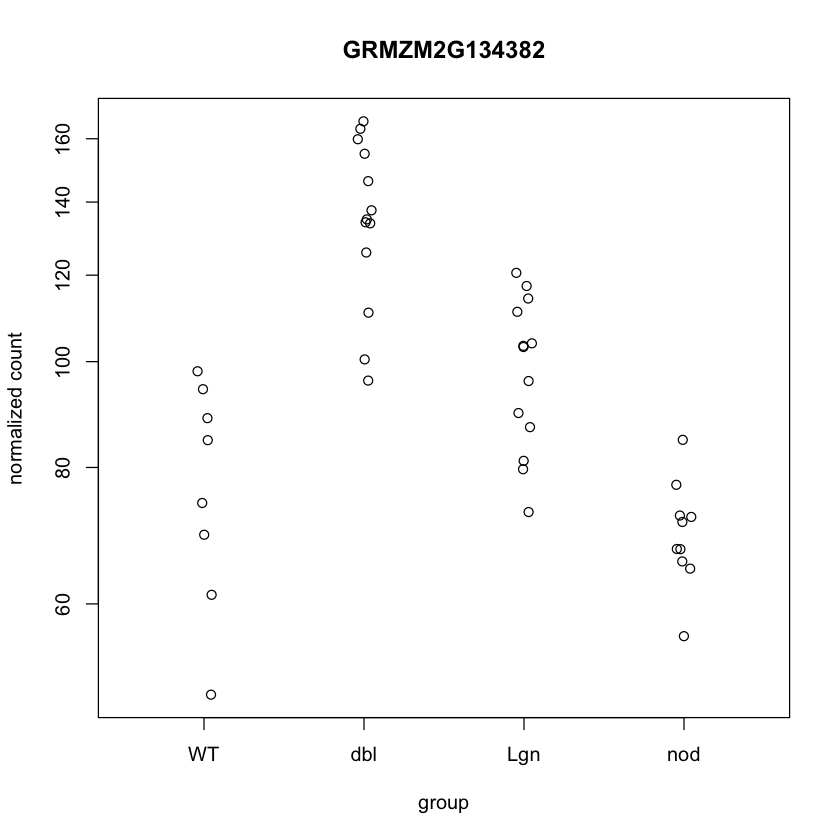

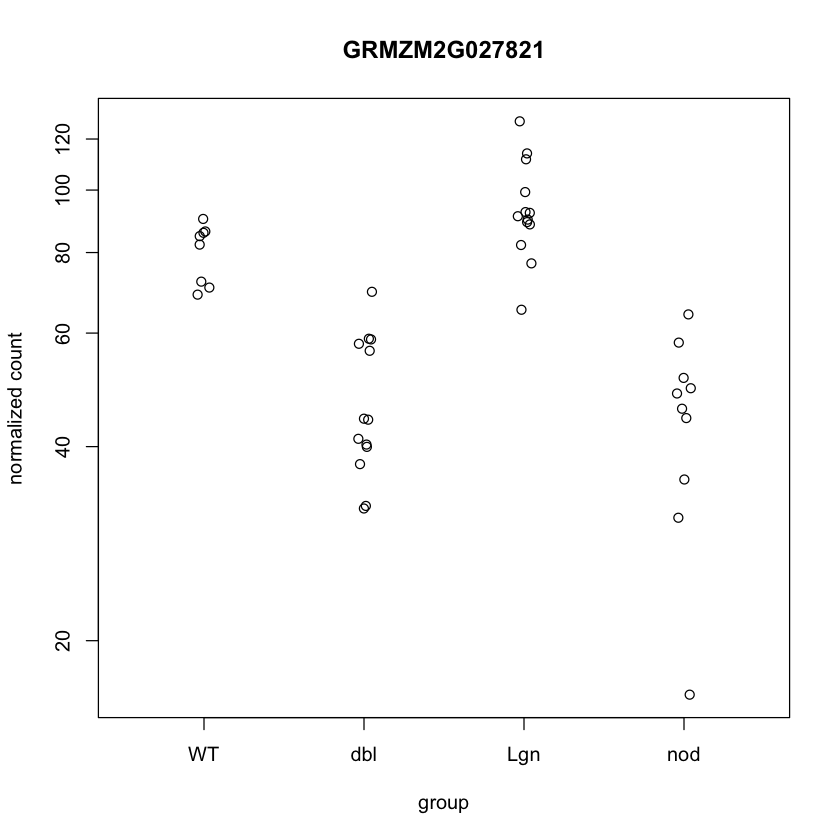

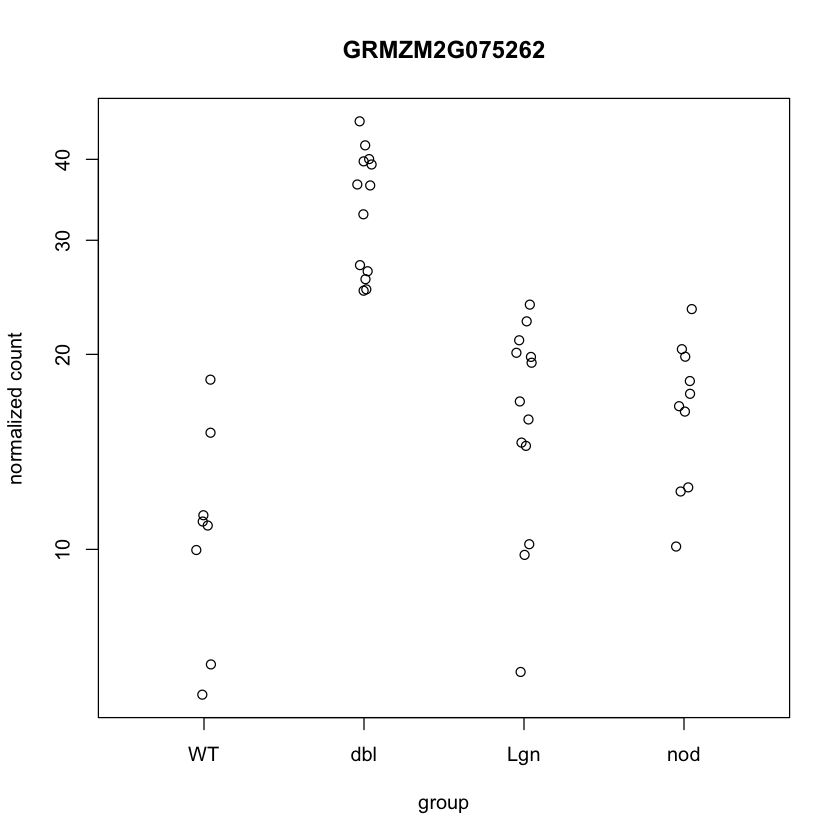

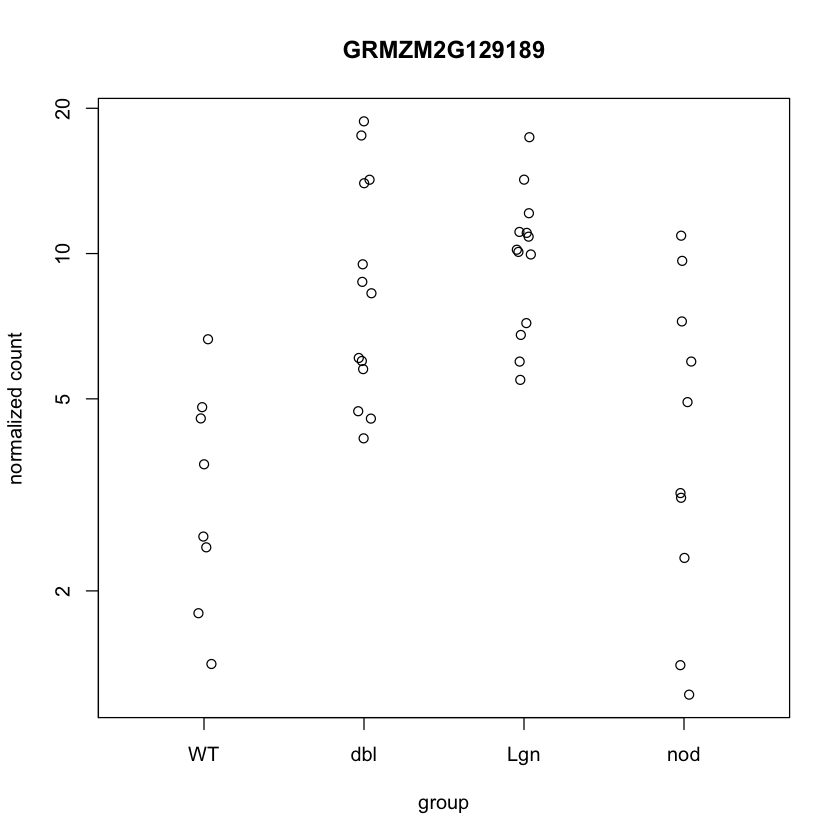

In [27]:
# re-check known genes
plotCounts(dds_drop, gene="GRMZM2G134382", intgroup="genotype") #Lgn
plotCounts(dds_drop, gene="GRMZM2G027821", intgroup="genotype") #nod
plotCounts(dds_drop, gene="GRMZM2G075262", intgroup="genotype") #sol
plotCounts(dds_drop, gene="GRMZM2G129189", intgroup="genotype") #EcPR4

# Discussion  
What do you think?  
Did we remove the right files?  

In [28]:
### get normalized counts to calculate FPKM
## will normalize to FPKM using column 6 from featureCounts data

FPM <- fpm(dds_drop, robust=T) #use the DESeq2 fpm() command
head(counts) #compare raw counts
head(FPM) #to normalized FPMs

dbl19_S46.counts.txt dbl28_S48.counts.txt dbl31_S41.counts.txt
GRMZM2G059865 1270                 859                  739                 
GRMZM5G888250   34                  11                   16                 
GRMZM2G093344   11                  16                   13                 
GRMZM2G093399    0                   0                    0                 
GRMZM5G809743   20                  34                   20                 
GRMZM5G833153   54                  65                   59                 
              dbl50_S43.counts.txt dbl54_S44.counts.txt dbl56_S50.counts.txt
GRMZM2G059865 812                  613                  700                 
GRMZM5G888250  22                   10                   25                 
GRMZM2G093344  11                    4                    9                 
GRMZM2G093399   0                    0                    0                 
GRMZM5G809743  16                   17                   20                 
GRMZM5G833153  54                   53                   43                 
              dbl57_S52.counts.txt dbl65_S42.counts.txt dbl66_S49.counts.txt
GRMZM2G059865 730                  966                  773                 
GRMZM5G888250   8                   24                   30                 
GRMZM2G093344  13                   13                   15                 
GRMZM2G093399   0                    0                    0                 
GRMZM5G809743  15                   48                   28                 
GRMZM5G833153  42                   85                   58                 
              dbl70_S47.counts.txt ⋯ WT24_S10.counts.txt WT25_S7.counts.txt
GRMZM2G059865 935                  ⋯ 122                 724               
GRMZM5G888250  16                  ⋯   5                  27               
GRMZM2G093344  21                  ⋯   4                   8               
GRMZM2G093399   0                  ⋯   0                   0               
GRMZM5G809743  20                  ⋯  14                  13               
GRMZM5G833153  59                  ⋯  50                  43               
              WT38_S5.counts.txt WT41_S6.counts.txt WT55_S9.counts.txt
GRMZM2G059865 1042               953                960               
GRMZM5G888250   25                26                 16               
GRMZM2G093344   20                14                 16               
GRMZM2G093399    0                 2                  0               
GRMZM5G809743   21                11                 21               
GRMZM5G833153   78                32                 38               
              WT58_S3.counts.txt WT78_S2.counts.txt WT93_S11.counts.txt
GRMZM2G059865 780                1181               423                
GRMZM5G888250  24                  32                 6                
GRMZM2G093344   7                  27                 7                
GRMZM2G093399   0                   0                 0                
GRMZM5G809743   9                  28                65                
GRMZM5G833153  28                  57               180                
              WT95_S13.counts.txt WT97_S1.counts.txt
GRMZM2G059865 427                 561               
GRMZM5G888250  16                  17               
GRMZM2G093344   6                  10               
GRMZM2G093399   0                   0               
GRMZM5G809743  25                  42               
GRMZM5G833153  92                 127

dbl19_S46.counts.txt dbl28_S48.counts.txt dbl31_S41.counts.txt
GRMZM2G059865    177.964136           159.988289           139.809863          
GRMZM5G888250      4.764394             2.048744             3.027007          
GRMZM2G093344      1.541422             2.979991             2.459443          
GRMZM5G809743      2.802585             6.332482             3.783758          
GRMZM5G833153      7.566979            12.106215            11.162086          
AC177838.2_FG015   3.363102             3.911239             4.351322          
                 dbl50_S43.counts.txt dbl54_S44.counts.txt dbl56_S50.counts.txt
GRMZM2G059865    175.537471           147.3960146          140.119635          
GRMZM5G888250      4.755941             2.4045027            5.004273          
GRMZM2G093344      2.377971             0.9618011            1.801538          
GRMZM5G809743      3.458866             4.0876546            4.003418          
GRMZM5G833153     11.673674            12.7438642            8.607349          
AC177838.2_FG015   2.810329             3.6067540            1.801538          
                 dbl57_S52.counts.txt dbl65_S42.counts.txt dbl66_S49.counts.txt
GRMZM2G059865    168.462592           158.824133           142.389210          
GRMZM5G888250      1.846165             3.945941             5.526101          
GRMZM2G093344      3.000019             2.137385             2.763051          
GRMZM5G809743      3.461560             7.891882             5.157695          
GRMZM5G833153      9.692368            13.975208            10.683796          
AC177838.2_FG015   2.538477             4.603598             2.578847          
                 dbl70_S47.counts.txt ⋯ nod60_S19.counts.txt
GRMZM2G059865    152.347293           ⋯ 181.963289          
GRMZM5G888250      2.607012           ⋯   3.676026          
GRMZM2G093344      3.421704           ⋯   2.363160          
GRMZM5G809743      3.258766           ⋯   6.564332          
GRMZM5G833153      9.613359           ⋯  13.128664          
AC177838.2_FG015   4.399334           ⋯   3.676026          
                 nod62_S14.counts.txt WT10_S8.counts.txt WT18_S4.counts.txt
GRMZM2G059865    178.2752629          240.178070         251.066188        
GRMZM5G888250      5.5518248            5.712612           7.251912        
GRMZM2G093344      2.1590430            1.986995           4.251121        
GRMZM5G809743      0.6168694            2.483744           8.002110        
GRMZM5G833153      5.8602595           10.928475          11.753098        
AC177838.2_FG015   1.8506083            4.222365           4.501187        
                 WT25_S7.counts.txt WT38_S5.counts.txt WT41_S6.counts.txt
GRMZM2G059865    223.177206         213.068324         222.007074        
GRMZM5G888250      8.322907           5.112004           6.056856        
GRMZM2G093344      2.466046           4.089603           3.261384        
GRMZM5G809743      4.007326           4.294083           2.562516        
GRMZM5G833153     13.255000          15.949452           7.454592        
AC177838.2_FG015   3.699070           5.520964           2.562516        
                 WT55_S9.counts.txt WT58_S3.counts.txt WT78_S2.counts.txt
GRMZM2G059865    207.717729         227.616429         227.400099        
GRMZM5G888250      3.461962           7.003582           6.161561        
GRMZM2G093344      3.461962           2.042712           5.198817        
GRMZM5G809743      4.543825           2.626343           5.391366        
GRMZM5G833153      8.222160           8.170846          10.975280        
AC177838.2_FG015   3.894707           2.334527           3.850975

In [29]:
# featureCounts saves transcript length in BP in column 6 of its output
# get transcript length from featureCounts column 6

featureCounts <- read.table(file_paths[1], sep="\t", header=T) # start by reading the first file
transcript_lengths <- cbind(featureCounts[,6]) # take the 6th column (bp lengths)
rownames(transcript_lengths) <- sub("gene:", "", featureCounts[,1]) # name by gene

head(transcript_lengths)

[,1]
GRMZM2G059865 2505
GRMZM5G888250  506
GRMZM2G093344 1012
GRMZM2G093399 1087
GRMZM5G809743  297
GRMZM5G833153  690

In [30]:
# divide FPM by matching transcript lengths / 1000

FPM_rownames <- rownames(transcript_lengths) %in% rownames(FPM) #find rownames that are in the final FPM table
subset_transcripts <- transcript_lengths[FPM_rownames,] #take the transcript length

head(subset_transcripts)

GRMZM2G059865    GRMZM5G888250    GRMZM2G093344    GRMZM5G809743 
            2505              506             1012              297 
   GRMZM5G833153 AC177838.2_FG015 
             690              783

In [31]:
# manually check some of the data
head ( FPM [1] / (subset_transcripts/1000) ) #try taking FPM column 1 and divide by transcript length

GRMZM2G059865    GRMZM5G888250    GRMZM2G093344    GRMZM5G809743 
        71.04357        351.70778        175.85389        599.20585 
   GRMZM5G833153 AC177838.2_FG015 
       257.91904        227.28498

In [32]:
# looks pretty good, so lets use an apply() function
# runs the same calculation on all columns
FPKM <- apply(FPM, 2, function(column) column / (subset_transcripts / 1000) ) # apply function by column (,"2",)
head(FPKM) #check the output

dbl19_S46.counts.txt dbl28_S48.counts.txt dbl31_S41.counts.txt
GRMZM2G059865    71.043567            63.867580            55.812321           
GRMZM5G888250     9.415799             4.048901             5.982226           
GRMZM2G093344     1.523144             2.944656             2.430279           
GRMZM5G809743     9.436313            21.321487            12.739926           
GRMZM5G833153    10.966636            17.545239            16.176937           
AC177838.2_FG015  4.295149             4.995196             5.557244           
                 dbl50_S43.counts.txt dbl54_S44.counts.txt dbl56_S50.counts.txt
GRMZM2G059865    70.074839            58.8407244           55.935982           
GRMZM5G888250     9.399094             4.7519816            9.889867           
GRMZM2G093344     2.349773             0.9503963            1.780176           
GRMZM5G809743    11.646015            13.7631467           13.479522           
GRMZM5G833153    16.918368            18.4693684           12.474419           
AC177838.2_FG015  3.589181             4.6063270            2.300815           
                 dbl57_S52.counts.txt dbl65_S42.counts.txt dbl66_S49.counts.txt
GRMZM2G059865    67.250536            63.402847            56.842000           
GRMZM5G888250     3.648548             7.798303            10.921149           
GRMZM2G093344     2.964445             2.112040             2.730287           
GRMZM5G809743    11.655085            26.571994            17.365975           
GRMZM5G833153    14.046911            20.253925            15.483762           
AC177838.2_FG015  3.241989             5.879436             3.293547           
                 dbl70_S47.counts.txt ⋯ nod60_S19.counts.txt
GRMZM2G059865    60.817282            ⋯ 72.640036           
GRMZM5G888250     5.152199            ⋯  7.264874           
GRMZM2G093344     3.381130            ⋯  2.335138           
GRMZM5G809743    10.972275            ⋯ 22.102129           
GRMZM5G833153    13.932404            ⋯ 19.027050           
AC177838.2_FG015  5.618561            ⋯  4.694797           
                 nod62_S14.counts.txt WT10_S8.counts.txt WT18_S4.counts.txt
GRMZM2G059865    71.167770            95.879469          100.226023        
GRMZM5G888250    10.971986            11.289747           14.331842        
GRMZM2G093344     2.133442             1.963434            4.200712        
GRMZM5G809743     2.077001             8.362775           26.943130        
GRMZM5G833153     8.493130            15.838369           17.033476        
AC177838.2_FG015  2.363484             5.392548            5.748642        
                 WT25_S7.counts.txt WT38_S5.counts.txt WT41_S6.counts.txt
GRMZM2G059865    89.092697          85.05722           88.625578         
GRMZM5G888250    16.448432          10.10277           11.970071         
GRMZM2G093344     2.436805           4.04111            3.222712         
GRMZM5G809743    13.492678          14.45819            8.628000         
GRMZM5G833153    19.210145          23.11515           10.803757         
AC177838.2_FG015  4.724227           7.05104            3.272690         
                 WT55_S9.counts.txt WT58_S3.counts.txt WT78_S2.counts.txt
GRMZM2G059865    82.921249          90.864842          90.778483         
GRMZM5G888250     6.841822          13.841072          12.176997         
GRMZM2G093344     3.420911           2.018490           5.137171         
GRMZM5G809743    15.299075           8.842907          18.152746         
GRMZM5G833153    11.916174          11.841806          15.906203         
AC177838.2_FG015  4.974084           2.981517           4.918232

In [33]:
# should change col names to reflect that these are not counts
sub(".counts.txt", "", colnames(FPKM)) #test that you can do it


[1] "dbl19_S46" "dbl28_S48" "dbl31_S41" "dbl50_S43" "dbl54_S44" "dbl56_S50"
 [7] "dbl57_S52" "dbl65_S42" "dbl66_S49" "dbl70_S47" "dbl88_S51" "dbl89_S40"
[13] "dbl9_S45"  "lgn17_S35" "lgn21_S36" "lgn28_S37" "lgn3_S39"  "lgn33_S38"
[19] "lgn37_S33" "lgn39_S27" "lgn42_S34" "lgn46_S30" "lgn59_S28" "lgn72_S31"
[25] "lgn77_S29" "lgn8_S32"  "nod14_S18" "nod16_S15" "nod30_S17" "nod36_S21"
[31] "nod43_S22" "nod47_S23" "nod48_S16" "nod6_S20"  "nod60_S19" "nod62_S14"
[37] "WT10_S8"   "WT18_S4"   "WT25_S7"   "WT38_S5"   "WT41_S6"   "WT55_S9"  
[43] "WT58_S3"   "WT78_S2"

In [34]:
#replace column names
colnames(FPKM) <- sub(".counts.txt", "", colnames(FPKM))

head(FPKM)

dbl19_S46 dbl28_S48 dbl31_S41 dbl50_S43 dbl54_S44  dbl56_S50
GRMZM2G059865    71.043567 63.867580 55.812321 70.074839 58.8407244 55.935982
GRMZM5G888250     9.415799  4.048901  5.982226  9.399094  4.7519816  9.889867
GRMZM2G093344     1.523144  2.944656  2.430279  2.349773  0.9503963  1.780176
GRMZM5G809743     9.436313 21.321487 12.739926 11.646015 13.7631467 13.479522
GRMZM5G833153    10.966636 17.545239 16.176937 16.918368 18.4693684 12.474419
AC177838.2_FG015  4.295149  4.995196  5.557244  3.589181  4.6063270  2.300815
                 dbl57_S52 dbl65_S42 dbl66_S49 dbl70_S47 ⋯ nod60_S19 nod62_S14
GRMZM2G059865    67.250536 63.402847 56.842000 60.817282 ⋯ 72.640036 71.167770
GRMZM5G888250     3.648548  7.798303 10.921149  5.152199 ⋯  7.264874 10.971986
GRMZM2G093344     2.964445  2.112040  2.730287  3.381130 ⋯  2.335138  2.133442
GRMZM5G809743    11.655085 26.571994 17.365975 10.972275 ⋯ 22.102129  2.077001
GRMZM5G833153    14.046911 20.253925 15.483762 13.932404 ⋯ 19.027050  8.493130
AC177838.2_FG015  3.241989  5.879436  3.293547  5.618561 ⋯  4.694797  2.363484
                 WT10_S8   WT18_S4    WT25_S7   WT38_S5  WT41_S6   WT55_S9  
GRMZM2G059865    95.879469 100.226023 89.092697 85.05722 88.625578 82.921249
GRMZM5G888250    11.289747  14.331842 16.448432 10.10277 11.970071  6.841822
GRMZM2G093344     1.963434   4.200712  2.436805  4.04111  3.222712  3.420911
GRMZM5G809743     8.362775  26.943130 13.492678 14.45819  8.628000 15.299075
GRMZM5G833153    15.838369  17.033476 19.210145 23.11515 10.803757 11.916174
AC177838.2_FG015  5.392548   5.748642  4.724227  7.05104  3.272690  4.974084
                 WT58_S3   WT78_S2  
GRMZM2G059865    90.864842 90.778483
GRMZM5G888250    13.841072 12.176997
GRMZM2G093344     2.018490  5.137171
GRMZM5G809743     8.842907 18.152746
GRMZM5G833153    11.841806 15.906203
AC177838.2_FG015  2.981517  4.918232

In [35]:
#write FPKM to file

#export as TSV
write.table(FPKM, 
            file="./DESeq2/FPKM_outlierdrop_normalized.13s.5c.txt",
            sep="\t", quote=F)

## Outliers removed, what can we learn from this data? 
Determine differentially expressed genes and compare between variables  

## try to make some venn diagrams of shared and unique responses
  
1) Lgn vs wt against nod vs wt  
2) double vs wt against Lgn vs wt against nod vs wt  

what do the comparisons mean?

In [36]:
sampleTable$genotype

[1] dbl dbl dbl dbl dbl dbl dbl dbl dbl dbl dbl dbl dbl Lgn Lgn Lgn Lgn Lgn Lgn
[20] Lgn Lgn Lgn Lgn Lgn Lgn Lgn nod nod nod nod nod nod nod nod nod nod nod nod
[39] nod WT  WT  WT  WT  WT  WT  WT  WT  WT  WT  WT  WT  WT 
Levels: WT dbl Lgn nod

In [37]:
# 1) how does Lgn vs wt compare with nod vs wt

LgnvWT <- results(dds_drop, contrast=c("genotype", "Lgn", "WT"), alpha=0.05) #calculates Lgn / WT
nodvWT <- results(dds_drop, contrast=c("genotype", "nod", "WT"), alpha=0.05) #calculates nod / WT

#export as TSV
write.table(as.data.frame(LgnvWT), 
            file="./DESeq2/LgnvWT.RMoutliers.13S.5C.txt",
            sep="\t", quote=F)
#export as TSV
write.table(as.data.frame(nodvWT), 
            file="./DESeq2/nodvWT.RMoutliers.13S.5C.txt",
            sep="\t", quote=F)


out of 22490 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)     : 2293, 10% 
LFC < 0 (down)   : 3981, 18% 
outliers [1]     : 0, 0% 
low counts [2]   : 0, 0% 
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



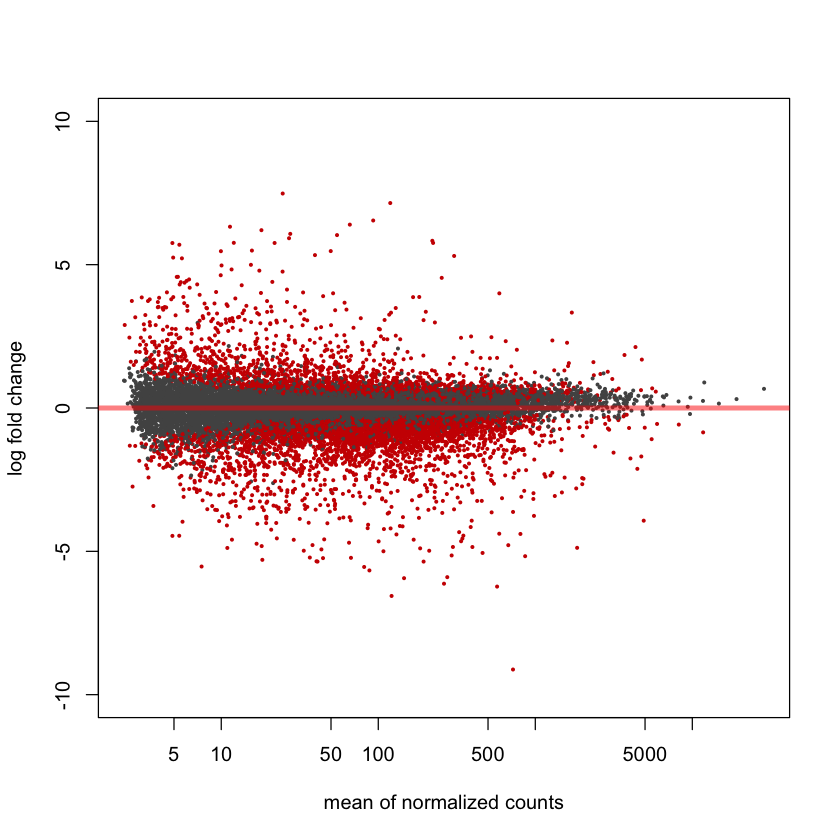

In [38]:
# general features of DEG
summary(LgnvWT)
plotMA(LgnvWT,ylim=c(-10,10))


out of 22490 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)     : 933, 4.1% 
LFC < 0 (down)   : 395, 1.8% 
outliers [1]     : 0, 0% 
low counts [2]   : 0, 0% 
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



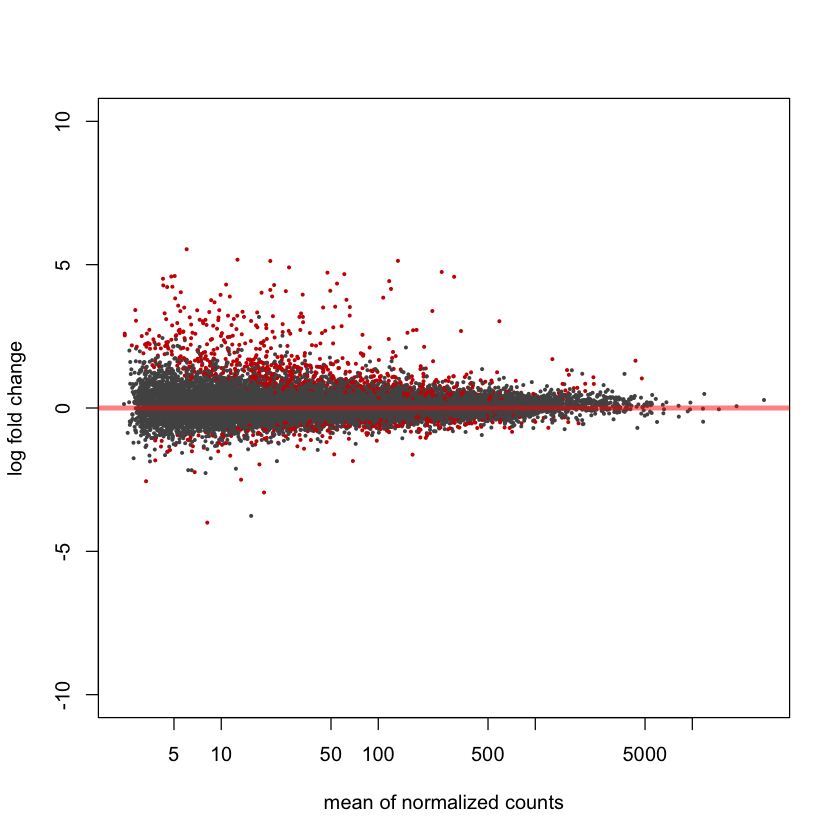

In [39]:
# general features of DEG
summary(nodvWT)
plotMA(nodvWT,ylim=c(-10,10))

In [40]:
# collect the DE transcript names

LgnWT_DEG <- rownames ( subset(LgnvWT, padj <= 0.05) )

# how many DEGs?
length(LgnWT_DEG)

nodWT_DEG <- rownames ( subset(nodvWT, padj <= 0.05) )

# how many DEGs?
length(nodWT_DEG)

# simply check the intersection of the DEG names
intersect(LgnWT_DEG, nodWT_DEG)
# what is the length of the intersection?
length(intersect(LgnWT_DEG, nodWT_DEG))

[1] 6274

[1] 1328

[1] "GRMZM2G388684"    "GRMZM2G137329"    "GRMZM2G044247"   
  [4] "GRMZM2G165422"    "GRMZM2G177508"    "GRMZM2G099454"   
  [7] "GRMZM2G410991"    "GRMZM2G472167"    "GRMZM2G407869"   
 [10] "GRMZM2G075958"    "GRMZM2G031790"    "GRMZM2G406601"   
 [13] "GRMZM2G115105"    "GRMZM2G018984"    "GRMZM2G013855"   
 [16] "GRMZM2G004523"    "GRMZM2G086604"    "GRMZM2G006977"   
 [19] "GRMZM2G005844"    "GRMZM2G121706"    "GRMZM2G070442"   
 [22] "GRMZM2G134251"    "GRMZM2G157580"    "GRMZM2G476914"   
 [25] "GRMZM2G072041"    "GRMZM2G165926"    "GRMZM2G089812"   
 [28] "GRMZM2G355450"    "GRMZM2G043291"    "GRMZM2G074401"   
 [31] "GRMZM2G087079"    "GRMZM2G006981"    "GRMZM2G008490"   
 [34] "GRMZM2G165919"    "GRMZM2G312661"    "GRMZM2G106408"   
 [37] "GRMZM2G044074"    "GRMZM2G075290"    "GRMZM2G311036"   
 [40] "GRMZM2G003138"    "GRMZM2G090018"    "GRMZM2G412430"   
 [43] "GRMZM2G048324"    "GRMZM2G074946"    "GRMZM2G460988"   
 [46] "GRMZM2G131853"    "GRMZM2G066441"    "GRMZM2G162251"   
 [49] "GRMZM2G028302"    "GRMZM2G040743"    "GRMZM2G113761"   
 [52] "GRMZM5G887922"    "GRMZM2G121128"    "GRMZM2G003318"   
 [55] "GRMZM2G090500"    "GRMZM2G388608"    "GRMZM2G433184"   
 [58] "GRMZM2G417382"    "GRMZM5G828630"    "GRMZM2G455784"   
 [61] "GRMZM2G017008"    "GRMZM2G119249"    "GRMZM2G074393"   
 [64] "GRMZM2G417451"    "GRMZM2G062788"    "GRMZM5G878058"   
 [67] "GRMZM2G038893"    "GRMZM2G130095"    "GRMZM2G052650"   
 [70] "GRMZM2G381822"    "GRMZM2G392791"    "GRMZM2G161335"   
 [73] "GRMZM2G085411"    "GRMZM2G108135"    "GRMZM2G310947"   
 [76] "GRMZM2G123489"    "GRMZM2G023847"    "GRMZM2G023591"   
 [79] "GRMZM2G467187"    "GRMZM2G164062"    "GRMZM5G822593"   
 [82] "GRMZM2G467263"    "GRMZM2G157350"    "GRMZM2G032597"   
 [85] "GRMZM2G113191"    "GRMZM2G117189"    "GRMZM2G457309"   
 [88] "GRMZM2G318803"    "GRMZM2G092823"    "GRMZM2G428554"   
 [91] "GRMZM2G161274"    "GRMZM2G079123"    "GRMZM2G324999"   
 [94] "GRMZM2G114093"    "GRMZM2G101116"    "GRMZM6G132224"   
 [97] "GRMZM2G181231"    "GRMZM2G123624"    "GRMZM2G414727"   
[100] "GRMZM2G172451"    "GRMZM2G167824"    "GRMZM2G346455"   
[103] "GRMZM2G153208"    "GRMZM2G413853"    "GRMZM2G019641"   
[106] "GRMZM2G017237"    "GRMZM2G124434"    "GRMZM2G020073"   
[109] "GRMZM2G031938"    "GRMZM2G171118"    "GRMZM2G129540"   
[112] "GRMZM2G038988"    "GRMZM5G812926"    "GRMZM2G341410"   
[115] "GRMZM2G039187"    "GRMZM2G066067"    "GRMZM2G134398"   
[118] "GRMZM2G478568"    "GRMZM2G068476"    "GRMZM2G363813"   
[121] "GRMZM2G079668"    "GRMZM2G153476"    "GRMZM2G004106"   
[124] "GRMZM2G025648"    "GRMZM5G826838"    "GRMZM2G090043"   
[127] "GRMZM2G301071"    "GRMZM2G159285"    "GRMZM2G078416"   
[130] "GRMZM2G011373"    "GRMZM2G074317"    "GRMZM2G039278"   
[133] "GRMZM2G105025"    "GRMZM2G164558"    "GRMZM2G427697"   
[136] "GRMZM2G463726"    "GRMZM2G038964"    "GRMZM2G069218"   
[139] "GRMZM2G163912"    "GRMZM2G029396"    "GRMZM2G161306"   
[142] "GRMZM2G013342"    "GRMZM5G862109"    "GRMZM2G177445"   
[145] "GRMZM2G123876"    "GRMZM2G119755"    "GRMZM2G114775"   
[148] "GRMZM2G352415"    "GRMZM2G118014"    "AC191009.3_FG004"
[151] "GRMZM5G896082"    "GRMZM2G101958"    "AC187891.3_FG006"
[154] "GRMZM2G093895"    "GRMZM2G181258"    "GRMZM2G001500"   
[157] "GRMZM2G013478"    "GRMZM2G176472"    "GRMZM2G097286"   
[160] "GRMZM2G700208"    "GRMZM2G016890"    "GRMZM2G049915"   
[163] "GRMZM2G035305"    "GRMZM2G008247"    "GRMZM2G328908"   
[166] "GRMZM2G052036"    "GRMZM2G034152"    "GRMZM2G046861"   
[169] "GRMZM2G112782"    "GRMZM2G039824"    "GRMZM2G165757"   
[172] "GRMZM2G123886"    "GRMZM2G393742"    "GRMZM2G028104"   
[175] "GRMZM2G109175"    "GRMZM2G017419"    "GRMZM2G148441"   
[178] "GRMZM2G177203"    "GRMZM2G123922"    "GRMZM2G425798"   
[181] "GRMZM2G052100"    "GRMZM2G046583"    "GRMZM2G075676"   
[184] "GRMZM2G043300"    "GRMZM5G870959"    "GRMZM2G125233"   
[187] "GRMZM2G134539"    "GRMZM2G437481"    "GRMZM2G335521"   
[190] "GRMZM2G101393"    "GRMZM2G

[1] 889

Warning message:
“package ‘VennDiagram’ was built under R version 3.4.4”Loading required package: grid
Loading required package: futile.logger


(polygon[GRID.polygon.2566], polygon[GRID.polygon.2567], polygon[GRID.polygon.2568], polygon[GRID.polygon.2569], text[GRID.text.2570], text[GRID.text.2571], text[GRID.text.2572], text[GRID.text.2573], text[GRID.text.2574]) 

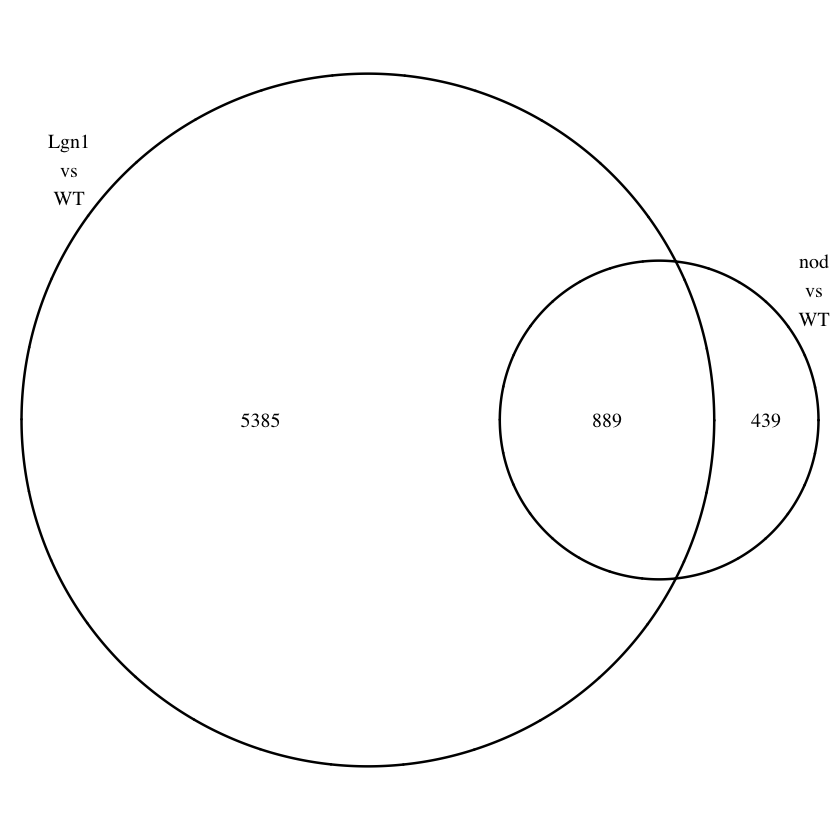

In [41]:
# use the VennDiagram package to make quick venn diagrams
library(VennDiagram)

# use draw.pairwise.venn() to compare two lists with their intersection
# circle area represents actual list size
draw.pairwise.venn(length(LgnWT_DEG), 
                   length(nodWT_DEG), 
                   length(intersect(LgnWT_DEG, nodWT_DEG)), 
                   category = c("Lgn1\nvs\nWT", "nod\nvs\nWT"), 
                   euler.d=T)

Warning message:
“package ‘pheatmap’ was built under R version 3.4.4”

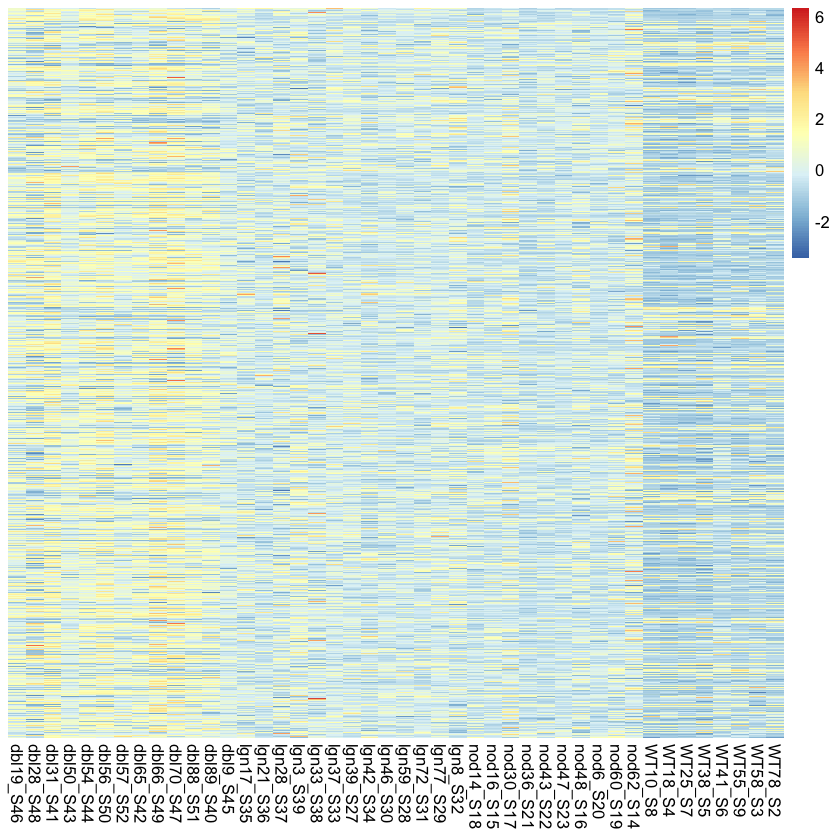

In [42]:
# make a heatmap of intersect transcripts
# are differentially-expressed genes regulated in the same direction
# or unique to each?

#try some heatmapping
# my favorite package for heatmaps is called pheatmap
library("pheatmap")

#pull out subset of FPKM data that is DE in both Lgn v wt and nod v wt
plot_data <- FPKM[intersect(LgnWT_DEG, nodWT_DEG),]

# rotate and scale FPKM values so every genes varies along the same scale
#make a heatmap
pheatmap(t(scale(t(plot_data))), cluster_rows=FALSE, 
         show_rownames=FALSE, show_colnames=TRUE,
         cluster_cols=FALSE, annotation_col=NULL)


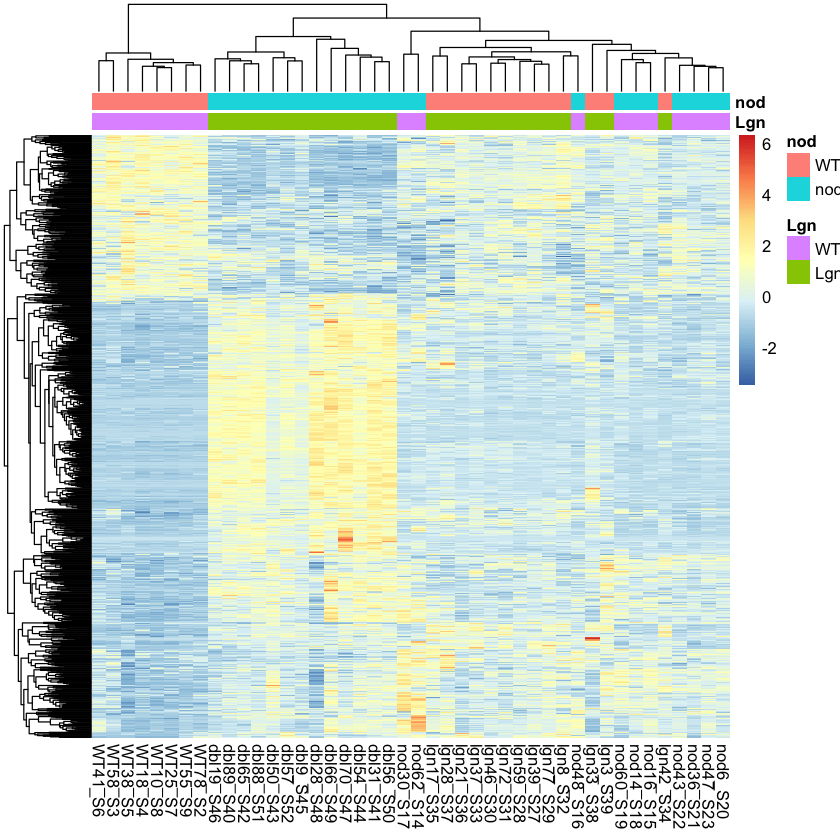

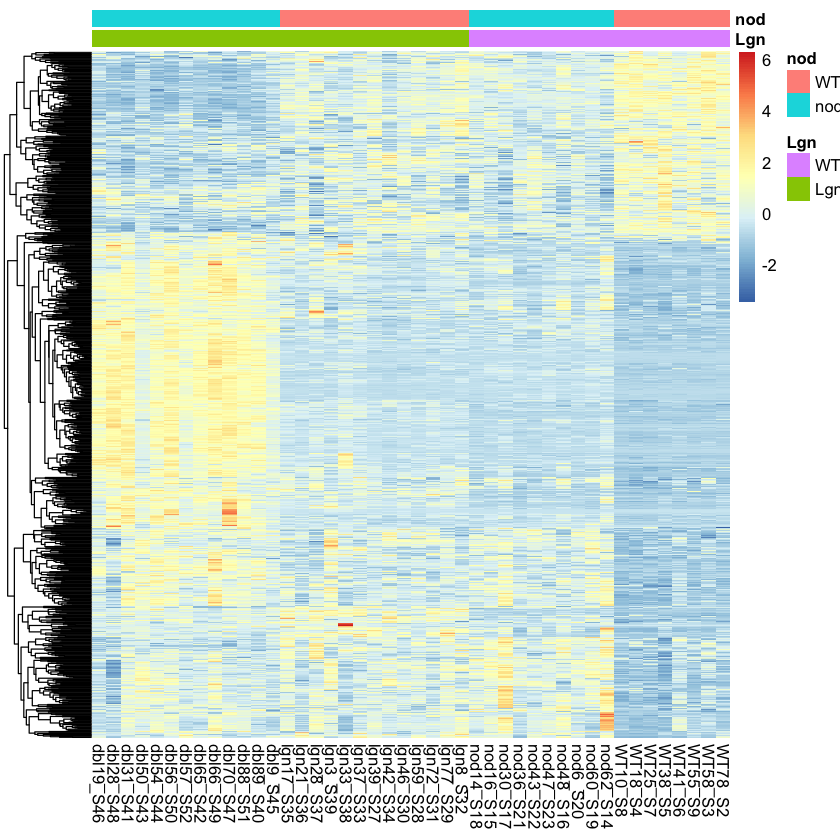

In [43]:
# quite chaotic, huh?
# we can cluster the genes and add margin annotations to improve the visual

#pull out annotation information from DESeq object
df <- as.data.frame(colData(dds_drop)[,c("Lgn","nod")])

#cluster samples and add annotation
pheatmap(t(scale(t(plot_data))), cluster_rows=TRUE, 
         show_rownames=FALSE, show_colnames=TRUE,
         cluster_cols=TRUE, annotation_col=df)

#leave samples in order and add annotation
pheatmap(t(scale(t(plot_data))), cluster_rows=TRUE, 
         show_rownames=FALSE, show_colnames=TRUE,
         cluster_cols=FALSE, annotation_col=df)

In [44]:
# 2) how does double vs WT compare with Lgn vs WT compare with nod vs WT

dblvWT <- results(dds_drop, contrast=c("genotype", "dbl", "WT"), alpha=0.05)
LgnvWT <- results(dds_drop, contrast=c("genotype", "Lgn", "WT"), alpha=0.05)
nodvWT <- results(dds_drop, contrast=c("genotype", "nod", "WT"), alpha=0.05)

#export as TSV
write.table(as.data.frame(dblvWT), 
            file="./DESeq2/doublevWT.RMoutliers.13S.5C.txt",
            sep="\t", quote=F)



out of 22490 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)     : 4182, 19% 
LFC < 0 (down)   : 4955, 22% 
outliers [1]     : 0, 0% 
low counts [2]   : 0, 0% 
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



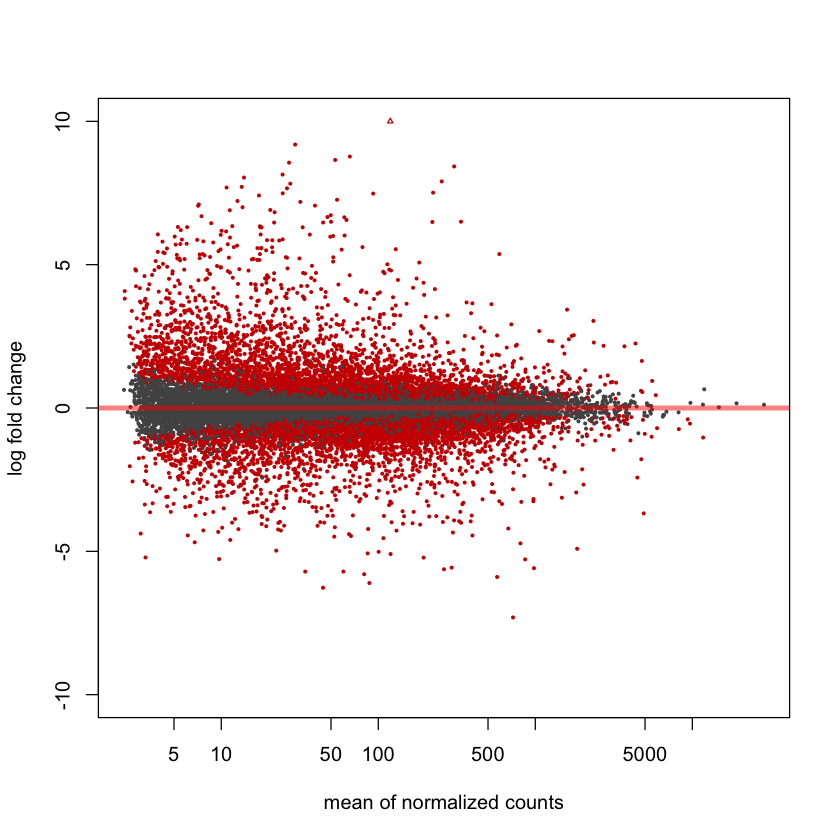

In [45]:
summary(dblvWT)
plotMA(dblvWT,ylim=c(-10,10))

In [46]:
# collect the DE transcript names

dblWT_DEG <- rownames ( subset(dblvWT, padj <= 0.05) )
length(dblWT_DEG)

LgnWT_DEG <- rownames ( subset(LgnvWT, padj <= 0.05) )
length(LgnWT_DEG)

nodWT_DEG <- rownames ( subset(nodvWT, padj <= 0.05) )
length(nodWT_DEG)

#find the intersection
intersect(dblWT_DEG, LgnWT_DEG)
length(intersect(dblWT_DEG, LgnWT_DEG))

#find the intersection
intersect(dblWT_DEG, nodWT_DEG)
length(intersect(dblWT_DEG, nodWT_DEG))

#find the intersection
intersect(LgnWT_DEG, nodWT_DEG)
length(intersect(LgnWT_DEG, nodWT_DEG))

#intersect the intersects
intersect(intersect(dblWT_DEG, LgnWT_DEG), nodWT_DEG)
length(intersect(intersect(dblWT_DEG, LgnWT_DEG), nodWT_DEG))

[1] 9137

[1] 6274

[1] 1328

[1] "GRMZM5G833153"    "GRMZM2G073979"    "GRMZM2G052586"   
   [4] "GRMZM2G097229"    "GRMZM2G388684"    "GRMZM2G137352"   
   [7] "GRMZM2G137329"    "GRMZM2G314660"    "GRMZM2G092165"   
  [10] "GRMZM2G126218"    "GRMZM2G044247"    "GRMZM2G088482"   
  [13] "GRMZM2G030299"    "GRMZM2G008327"    "GRMZM2G013634"   
  [16] "GRMZM2G312438"    "GRMZM2G013986"    "GRMZM2G176820"   
  [19] "GRMZM2G070047"    "GRMZM2G159477"    "GRMZM2G165422"   
  [22] "GRMZM2G119471"    "GRMZM2G176521"    "GRMZM2G177508"   
  [25] "GRMZM2G129243"    "GRMZM2G032409"    "GRMZM5G845611"   
  [28] "GRMZM2G089092"    "GRMZM2G020548"    "GRMZM2G099598"   
  [31] "GRMZM2G099454"    "GRMZM2G110345"    "GRMZM2G410991"   
  [34] "GRMZM2G176499"    "GRMZM2G176397"    "GRMZM5G833774"   
  [37] "GRMZM2G472167"    "GRMZM2G062946"    "GRMZM2G450125"   
  [40] "GRMZM2G355846"    "GRMZM2G407869"    "GRMZM2G103599"   
  [43] "GRMZM2G117855"    "GRMZM2G418037"    "GRMZM2G439049"   
  [46] "GRMZM2G086093"    "GRMZM2G329159"    "GRMZM2G112640"   
  [49] "GRMZM2G086163"    "GRMZM2G086072"    "GRMZM2G140339"   
  [52] "GRMZM2G141636"    "GRMZM2G075958"    "GRMZM2G076062"   
  [55] "GRMZM2G453001"    "GRMZM2G154036"    "GRMZM2G031790"   
  [58] "GRMZM2G172448"    "GRMZM2G377311"    "GRMZM2G004641"   
  [61] "GRMZM2G123986"    "GRMZM2G115131"    "GRMZM2G417835"   
  [64] "GRMZM2G136113"    "GRMZM2G124353"    "GRMZM2G406601"   
  [67] "GRMZM2G000686"    "GRMZM2G064663"    "GRMZM2G017254"   
  [70] "GRMZM2G115105"    "GRMZM2G018984"    "AC206951.3_FG017"
  [73] "GRMZM2G059102"    "GRMZM2G385605"    "GRMZM2G009326"   
  [76] "GRMZM2G132367"    "GRMZM2G154007"    "GRMZM2G397055"   
  [79] "GRMZM2G464393"    "AC166636.1_FG007" "GRMZM2G013855"   
  [82] "GRMZM2G064841"    "GRMZM2G464515"    "GRMZM2G004523"   
  [85] "GRMZM2G086604"    "GRMZM2G114234"    "GRMZM2G114190"   
  [88] "GRMZM2G006977"    "GRMZM2G457201"    "GRMZM2G007486"   
  [91] "GRMZM2G140674"    "GRMZM2G005844"    "GRMZM2G005624"   
  [94] "GRMZM2G121706"    "GRMZM2G047513"    "GRMZM2G103873"   
  [97] "GRMZM2G042171"    "GRMZM2G071343"    "GRMZM2G032423"   
 [100] "GRMZM2G023364"    "GRMZM2G070442"    "GRMZM2G091563"   
 [103] "GRMZM2G099767"    "GRMZM2G165622"    "GRMZM2G134251"   
 [106] "GRMZM2G157580"    "GRMZM2G164974"    "GRMZM2G040728"   
 [109] "GRMZM2G050514"    "GRMZM2G099860"    "GRMZM2G433579"   
 [112] "GRMZM2G476914"    "GRMZM2G180458"    "GRMZM2G043470"   
 [115] "GRMZM2G012758"    "GRMZM2G118497"    "GRMZM2G152447"   
 [118] "GRMZM2G152663"    "GRMZM5G818431"    "GRMZM2G108138"   
 [121] "GRMZM2G108032"    "GRMZM2G149636"    "GRMZM2G149646"   
 [124] "GRMZM2G110023"    "GRMZM2G035552"    "GRMZM2G089812"   
 [127] "GRMZM2G355450"    "GRMZM2G164562"    "GRMZM2G127123"   
 [130] "GRMZM2G703555"    "GRMZM2G128206"    "AC208204.3_FG006"
 [133] "GRMZM2G046382"    "GRMZM2G160198"    "GRMZM2G160237"   
 [136] "GRMZM2G160452"    "GRMZM2G057646"    "GRMZM5G804658"   
 [139] "GRMZM2G078164"    "GRMZM2G179432"    "GRMZM2G174644"   
 [142] "GRMZM2G087600"    "GRMZM2G087459"    "GRMZM2G113002"   
 [145] "GRMZM2G160906"    "GRMZM5G891990"    "GRMZM2G044027"   
 [148] "GRMZM2G078052"    "GRMZM2G042107"    "GRMZM2G043291"   
 [151] "AC217300.3_FG005" "GRMZM2G107731"    "GRMZM2G074401"   
 [154] "GRMZM2G053669"    "GRMZM2G087079"    "GRMZM2G307992"   
 [157] "GRMZM2G006981"    "GRMZM2G007206"    "GRMZM2G153450"   
 [160] "GRMZM2G112538"    "GRMZM2G112524"    "GRMZM2G162356"   
 [163] "GRMZM2G013957"    "GRMZM2G140432"    "GRMZM2G121871"   
 [166] "GRMZM2G013639"    "GRMZM2G394203"    "GRMZM2G033491"   
 [169] "GRMZM2G008490"    "GRMZM2G165919"    "GRMZM2G138814"   
 [172] "GRMZM2G180889"    "GRMZM2G033570"    "GRMZM2G042615"   
 [175] "GRMZM2G023715"    "GRMZM2G312661"    "GRMZM2G106283"   
 [178] "GRMZM2G106408"    "GRMZM2G320325"    "GRMZM2G072892"   
 [181] "GRMZM2G062391"    "GRMZM2G044074"    "GRMZM2G010823"   
 [184] "GRMZM2G311182"    "GRMZM2G318780"    "GRMZM2G073755"   
 [187] "GRMZM2G158662"    "GRMZM2G1

[1] 4630

[1] "GRMZM2G388684"    "GRMZM2G137329"    "GRMZM2G044247"   
   [4] "GRMZM2G165422"    "GRMZM2G177508"    "GRMZM2G109566"   
   [7] "GRMZM2G095968"    "GRMZM2G099454"    "GRMZM2G059428"   
  [10] "GRMZM2G410991"    "GRMZM2G096153"    "GRMZM2G056377"   
  [13] "GRMZM2G472167"    "GRMZM5G860938"    "GRMZM2G407869"   
  [16] "GRMZM2G170567"    "GRMZM2G113174"    "GRMZM2G028521"   
  [19] "GRMZM2G027821"    "GRMZM5G813886"    "GRMZM2G075958"   
  [22] "GRMZM2G031790"    "GRMZM2G034302"    "GRMZM2G035243"   
  [25] "GRMZM2G406601"    "GRMZM5G838098"    "GRMZM2G115105"   
  [28] "GRMZM2G018984"    "GRMZM2G398848"    "GRMZM2G015571"   
  [31] "GRMZM2G013855"    "GRMZM2G004523"    "GRMZM2G086604"   
  [34] "GRMZM2G006977"    "GRMZM2G015219"    "GRMZM2G127635"   
  [37] "GRMZM2G005844"    "GRMZM2G121706"    "GRMZM2G070442"   
  [40] "GRMZM2G015804"    "GRMZM2G163043"    "GRMZM2G134251"   
  [43] "GRMZM2G157580"    "GRMZM2G476914"    "GRMZM2G012126"   
  [46] "GRMZM2G088843"    "GRMZM2G077942"    "GRMZM2G089812"   
  [49] "GRMZM2G355450"    "GRMZM2G174615"    "GRMZM2G151582"   
  [52] "GRMZM2G540403"    "GRMZM2G141799"    "GRMZM2G119168"   
  [55] "GRMZM2G305526"    "GRMZM2G043291"    "GRMZM2G074401"   
  [58] "GRMZM2G087079"    "GRMZM2G006981"    "GRMZM2G011483"   
  [61] "GRMZM2G008490"    "GRMZM2G070849"    "GRMZM2G165919"   
  [64] "GRMZM2G152891"    "GRMZM2G031001"    "GRMZM2G312661"   
  [67] "GRMZM2G106408"    "GRMZM2G044074"    "GRMZM2G075290"   
  [70] "GRMZM2G115921"    "GRMZM2G703582"    "GRMZM2G382569"   
  [73] "GRMZM2G311036"    "GRMZM2G336824"    "GRMZM2G003138"   
  [76] "GRMZM2G152877"    "GRMZM2G090018"    "GRMZM2G412430"   
  [79] "GRMZM2G048324"    "GRMZM2G382774"    "GRMZM2G074946"   
  [82] "GRMZM2G460988"    "GRMZM2G174708"    "GRMZM2G084587"   
  [85] "GRMZM2G132794"    "GRMZM2G131853"    "GRMZM2G066441"   
  [88] "GRMZM2G353553"    "GRMZM2G162251"    "GRMZM2G028302"   
  [91] "GRMZM2G040743"    "GRMZM2G113761"    "GRMZM2G425719"   
  [94] "GRMZM5G887922"    "GRMZM2G121128"    "GRMZM2G003318"   
  [97] "GRMZM2G090500"    "GRMZM2G388608"    "GRMZM2G433184"   
 [100] "GRMZM2G417382"    "GRMZM5G828630"    "GRMZM2G455784"   
 [103] "GRMZM2G017008"    "GRMZM2G119249"    "GRMZM2G123900"   
 [106] "GRMZM2G074393"    "GRMZM2G417451"    "GRMZM2G062788"   
 [109] "GRMZM2G060690"    "GRMZM5G878058"    "GRMZM2G065496"   
 [112] "GRMZM2G127739"    "GRMZM2G038855"    "GRMZM2G038893"   
 [115] "GRMZM2G130095"    "GRMZM2G100121"    "GRMZM2G052650"   
 [118] "GRMZM2G107984"    "GRMZM2G381822"    "AC203989.4_FG001"
 [121] "GRMZM2G094742"    "GRMZM2G392791"    "GRMZM2G161335"   
 [124] "GRMZM2G085411"    "GRMZM2G108135"    "GRMZM2G310947"   
 [127] "GRMZM2G123489"    "GRMZM2G023847"    "GRMZM2G023591"   
 [130] "GRMZM2G467187"    "GRMZM2G164062"    "GRMZM5G822593"   
 [133] "GRMZM2G467263"    "GRMZM2G157350"    "GRMZM2G032597"   
 [136] "GRMZM2G161233"    "GRMZM2G083538"    "GRMZM2G317770"   
 [139] "GRMZM2G113191"    "GRMZM2G117189"    "GRMZM2G457309"   
 [142] "GRMZM2G318803"    "GRMZM2G090177"    "GRMZM2G092823"   
 [145] "GRMZM2G428554"    "GRMZM2G151955"    "GRMZM2G161274"   
 [148] "GRMZM2G079123"    "GRMZM2G324999"    "GRMZM2G114093"   
 [151] "GRMZM2G101116"    "GRMZM2G067626"    "GRMZM2G181231"   
 [154] "GRMZM2G123624"    "GRMZM2G414727"    "GRMZM2G172451"   
 [157] "GRMZM2G167824"    "GRMZM2G346455"    "GRMZM2G153208"   
 [160] "GRMZM2G413853"    "GRMZM2G019641"    "GRMZM2G154090"   
 [163] "GRMZM2G017388"    "GRMZM2G127421"    "GRMZM2G017237"   
 [166] "GRMZM2G124434"    "GRMZM2G020073"    "GRMZM2G031938"   
 [169] "GRMZM2G171118"    "GRMZM2G129540"    "GRMZM2G038988"   
 [172] "GRMZM5G812926"    "GRMZM5G872578"    "GRMZM2G341410"   
 [175] "GRMZM2G039187"    "GRMZM2G066067"    "GRMZM2G359127"   
 [178] "GRMZM2G134398"    "GRMZM2G169372"    "GRMZM2G038677"   
 [181] "GRMZM2G478568"    "GRMZM2G068476"    "GRMZM2G363813"   
 [184] "GRMZM2G079668"    "GRMZM2G346263"    "GRMZM2G004106"   
 [187] "GRMZM2G004160"    "GRMZM2G1

[1] 1182

[1] "GRMZM2G388684"    "GRMZM2G137329"    "GRMZM2G044247"   
  [4] "GRMZM2G165422"    "GRMZM2G177508"    "GRMZM2G099454"   
  [7] "GRMZM2G410991"    "GRMZM2G472167"    "GRMZM2G407869"   
 [10] "GRMZM2G075958"    "GRMZM2G031790"    "GRMZM2G406601"   
 [13] "GRMZM2G115105"    "GRMZM2G018984"    "GRMZM2G013855"   
 [16] "GRMZM2G004523"    "GRMZM2G086604"    "GRMZM2G006977"   
 [19] "GRMZM2G005844"    "GRMZM2G121706"    "GRMZM2G070442"   
 [22] "GRMZM2G134251"    "GRMZM2G157580"    "GRMZM2G476914"   
 [25] "GRMZM2G072041"    "GRMZM2G165926"    "GRMZM2G089812"   
 [28] "GRMZM2G355450"    "GRMZM2G043291"    "GRMZM2G074401"   
 [31] "GRMZM2G087079"    "GRMZM2G006981"    "GRMZM2G008490"   
 [34] "GRMZM2G165919"    "GRMZM2G312661"    "GRMZM2G106408"   
 [37] "GRMZM2G044074"    "GRMZM2G075290"    "GRMZM2G311036"   
 [40] "GRMZM2G003138"    "GRMZM2G090018"    "GRMZM2G412430"   
 [43] "GRMZM2G048324"    "GRMZM2G074946"    "GRMZM2G460988"   
 [46] "GRMZM2G131853"    "GRMZM2G066441"    "GRMZM2G162251"   
 [49] "GRMZM2G028302"    "GRMZM2G040743"    "GRMZM2G113761"   
 [52] "GRMZM5G887922"    "GRMZM2G121128"    "GRMZM2G003318"   
 [55] "GRMZM2G090500"    "GRMZM2G388608"    "GRMZM2G433184"   
 [58] "GRMZM2G417382"    "GRMZM5G828630"    "GRMZM2G455784"   
 [61] "GRMZM2G017008"    "GRMZM2G119249"    "GRMZM2G074393"   
 [64] "GRMZM2G417451"    "GRMZM2G062788"    "GRMZM5G878058"   
 [67] "GRMZM2G038893"    "GRMZM2G130095"    "GRMZM2G052650"   
 [70] "GRMZM2G381822"    "GRMZM2G392791"    "GRMZM2G161335"   
 [73] "GRMZM2G085411"    "GRMZM2G108135"    "GRMZM2G310947"   
 [76] "GRMZM2G123489"    "GRMZM2G023847"    "GRMZM2G023591"   
 [79] "GRMZM2G467187"    "GRMZM2G164062"    "GRMZM5G822593"   
 [82] "GRMZM2G467263"    "GRMZM2G157350"    "GRMZM2G032597"   
 [85] "GRMZM2G113191"    "GRMZM2G117189"    "GRMZM2G457309"   
 [88] "GRMZM2G318803"    "GRMZM2G092823"    "GRMZM2G428554"   
 [91] "GRMZM2G161274"    "GRMZM2G079123"    "GRMZM2G324999"   
 [94] "GRMZM2G114093"    "GRMZM2G101116"    "GRMZM6G132224"   
 [97] "GRMZM2G181231"    "GRMZM2G123624"    "GRMZM2G414727"   
[100] "GRMZM2G172451"    "GRMZM2G167824"    "GRMZM2G346455"   
[103] "GRMZM2G153208"    "GRMZM2G413853"    "GRMZM2G019641"   
[106] "GRMZM2G017237"    "GRMZM2G124434"    "GRMZM2G020073"   
[109] "GRMZM2G031938"    "GRMZM2G171118"    "GRMZM2G129540"   
[112] "GRMZM2G038988"    "GRMZM5G812926"    "GRMZM2G341410"   
[115] "GRMZM2G039187"    "GRMZM2G066067"    "GRMZM2G134398"   
[118] "GRMZM2G478568"    "GRMZM2G068476"    "GRMZM2G363813"   
[121] "GRMZM2G079668"    "GRMZM2G153476"    "GRMZM2G004106"   
[124] "GRMZM2G025648"    "GRMZM5G826838"    "GRMZM2G090043"   
[127] "GRMZM2G301071"    "GRMZM2G159285"    "GRMZM2G078416"   
[130] "GRMZM2G011373"    "GRMZM2G074317"    "GRMZM2G039278"   
[133] "GRMZM2G105025"    "GRMZM2G164558"    "GRMZM2G427697"   
[136] "GRMZM2G463726"    "GRMZM2G038964"    "GRMZM2G069218"   
[139] "GRMZM2G163912"    "GRMZM2G029396"    "GRMZM2G161306"   
[142] "GRMZM2G013342"    "GRMZM5G862109"    "GRMZM2G177445"   
[145] "GRMZM2G123876"    "GRMZM2G119755"    "GRMZM2G114775"   
[148] "GRMZM2G352415"    "GRMZM2G118014"    "AC191009.3_FG004"
[151] "GRMZM5G896082"    "GRMZM2G101958"    "AC187891.3_FG006"
[154] "GRMZM2G093895"    "GRMZM2G181258"    "GRMZM2G001500"   
[157] "GRMZM2G013478"    "GRMZM2G176472"    "GRMZM2G097286"   
[160] "GRMZM2G700208"    "GRMZM2G016890"    "GRMZM2G049915"   
[163] "GRMZM2G035305"    "GRMZM2G008247"    "GRMZM2G328908"   
[166] "GRMZM2G052036"    "GRMZM2G034152"    "GRMZM2G046861"   
[169] "GRMZM2G112782"    "GRMZM2G039824"    "GRMZM2G165757"   
[172] "GRMZM2G123886"    "GRMZM2G393742"    "GRMZM2G028104"   
[175] "GRMZM2G109175"    "GRMZM2G017419"    "GRMZM2G148441"   
[178] "GRMZM2G177203"    "GRMZM2G123922"    "GRMZM2G425798"   
[181] "GRMZM2G052100"    "GRMZM2G046583"    "GRMZM2G075676"   
[184] "GRMZM2G043300"    "GRMZM5G870959"    "GRMZM2G125233"   
[187] "GRMZM2G134539"    "GRMZM2G437481"    "GRMZM2G335521"   
[190] "GRMZM2G101393"    "GRMZM2G

[1] 889

[1] "GRMZM2G388684"    "GRMZM2G137329"    "GRMZM2G044247"   
  [4] "GRMZM2G165422"    "GRMZM2G177508"    "GRMZM2G099454"   
  [7] "GRMZM2G410991"    "GRMZM2G472167"    "GRMZM2G407869"   
 [10] "GRMZM2G075958"    "GRMZM2G031790"    "GRMZM2G406601"   
 [13] "GRMZM2G115105"    "GRMZM2G018984"    "GRMZM2G013855"   
 [16] "GRMZM2G004523"    "GRMZM2G086604"    "GRMZM2G006977"   
 [19] "GRMZM2G005844"    "GRMZM2G121706"    "GRMZM2G070442"   
 [22] "GRMZM2G134251"    "GRMZM2G157580"    "GRMZM2G476914"   
 [25] "GRMZM2G089812"    "GRMZM2G355450"    "GRMZM2G043291"   
 [28] "GRMZM2G074401"    "GRMZM2G087079"    "GRMZM2G006981"   
 [31] "GRMZM2G008490"    "GRMZM2G165919"    "GRMZM2G312661"   
 [34] "GRMZM2G106408"    "GRMZM2G044074"    "GRMZM2G075290"   
 [37] "GRMZM2G311036"    "GRMZM2G003138"    "GRMZM2G090018"   
 [40] "GRMZM2G412430"    "GRMZM2G048324"    "GRMZM2G074946"   
 [43] "GRMZM2G460988"    "GRMZM2G131853"    "GRMZM2G066441"   
 [46] "GRMZM2G162251"    "GRMZM2G028302"    "GRMZM2G040743"   
 [49] "GRMZM2G113761"    "GRMZM5G887922"    "GRMZM2G121128"   
 [52] "GRMZM2G003318"    "GRMZM2G090500"    "GRMZM2G388608"   
 [55] "GRMZM2G433184"    "GRMZM2G417382"    "GRMZM5G828630"   
 [58] "GRMZM2G455784"    "GRMZM2G017008"    "GRMZM2G119249"   
 [61] "GRMZM2G074393"    "GRMZM2G417451"    "GRMZM2G062788"   
 [64] "GRMZM5G878058"    "GRMZM2G038893"    "GRMZM2G130095"   
 [67] "GRMZM2G052650"    "GRMZM2G381822"    "GRMZM2G392791"   
 [70] "GRMZM2G161335"    "GRMZM2G085411"    "GRMZM2G108135"   
 [73] "GRMZM2G310947"    "GRMZM2G123489"    "GRMZM2G023847"   
 [76] "GRMZM2G023591"    "GRMZM2G467187"    "GRMZM2G164062"   
 [79] "GRMZM5G822593"    "GRMZM2G467263"    "GRMZM2G157350"   
 [82] "GRMZM2G032597"    "GRMZM2G113191"    "GRMZM2G117189"   
 [85] "GRMZM2G457309"    "GRMZM2G318803"    "GRMZM2G092823"   
 [88] "GRMZM2G428554"    "GRMZM2G161274"    "GRMZM2G079123"   
 [91] "GRMZM2G324999"    "GRMZM2G114093"    "GRMZM2G101116"   
 [94] "GRMZM2G181231"    "GRMZM2G123624"    "GRMZM2G414727"   
 [97] "GRMZM2G172451"    "GRMZM2G167824"    "GRMZM2G346455"   
[100] "GRMZM2G153208"    "GRMZM2G413853"    "GRMZM2G019641"   
[103] "GRMZM2G017237"    "GRMZM2G124434"    "GRMZM2G020073"   
[106] "GRMZM2G031938"    "GRMZM2G171118"    "GRMZM2G129540"   
[109] "GRMZM2G038988"    "GRMZM5G812926"    "GRMZM2G341410"   
[112] "GRMZM2G039187"    "GRMZM2G066067"    "GRMZM2G134398"   
[115] "GRMZM2G478568"    "GRMZM2G068476"    "GRMZM2G363813"   
[118] "GRMZM2G079668"    "GRMZM2G004106"    "GRMZM2G025648"   
[121] "GRMZM5G826838"    "GRMZM2G090043"    "GRMZM2G301071"   
[124] "GRMZM2G159285"    "GRMZM2G078416"    "GRMZM2G011373"   
[127] "GRMZM2G074317"    "GRMZM2G039278"    "GRMZM2G105025"   
[130] "GRMZM2G164558"    "GRMZM2G427697"    "GRMZM2G463726"   
[133] "GRMZM2G038964"    "GRMZM2G069218"    "GRMZM2G163912"   
[136] "GRMZM2G029396"    "GRMZM2G161306"    "GRMZM2G013342"   
[139] "GRMZM5G862109"    "GRMZM2G177445"    "GRMZM2G123876"   
[142] "GRMZM2G119755"    "GRMZM2G114775"    "GRMZM2G352415"   
[145] "GRMZM2G118014"    "AC191009.3_FG004" "GRMZM5G896082"   
[148] "GRMZM2G101958"    "AC187891.3_FG006" "GRMZM2G093895"   
[151] "GRMZM2G181258"    "GRMZM2G001500"    "GRMZM2G013478"   
[154] "GRMZM2G176472"    "GRMZM2G097286"    "GRMZM2G700208"   
[157] "GRMZM2G016890"    "GRMZM2G049915"    "GRMZM2G035305"   
[160] "GRMZM2G008247"    "GRMZM2G328908"    "GRMZM2G052036"   
[163] "GRMZM2G034152"    "GRMZM2G046861"    "GRMZM2G112782"   
[166] "GRMZM2G039824"    "GRMZM2G165757"    "GRMZM2G123886"   
[169] "GRMZM2G393742"    "GRMZM2G028104"    "GRMZM2G109175"   
[172] "GRMZM2G017419"    "GRMZM2G148441"    "GRMZM2G177203"   
[175] "GRMZM2G123922"    "GRMZM2G425798"    "GRMZM2G052100"   
[178] "GRMZM2G046583"    "GRMZM2G075676"    "GRMZM2G043300"   
[181] "GRMZM5G870959"    "GRMZM2G125233"    "GRMZM2G134539"   
[184] "GRMZM2G437481"    "GRMZM2G335521"    "GRMZM2G101393"   
[187] "GRMZM2G175140"    "GRMZM2G031721"    "GRMZM2G055178"   
[190] "AC206901.3_FG005" "GRMZM5G

[1] 846

(polygon[GRID.polygon.2627], polygon[GRID.polygon.2628], polygon[GRID.polygon.2629], polygon[GRID.polygon.2630], polygon[GRID.polygon.2631], polygon[GRID.polygon.2632], text[GRID.text.2633], text[GRID.text.2634], text[GRID.text.2635], text[GRID.text.2636], text[GRID.text.2637], text[GRID.text.2638], text[GRID.text.2639], text[GRID.text.2640], text[GRID.text.2641], text[GRID.text.2642]) 

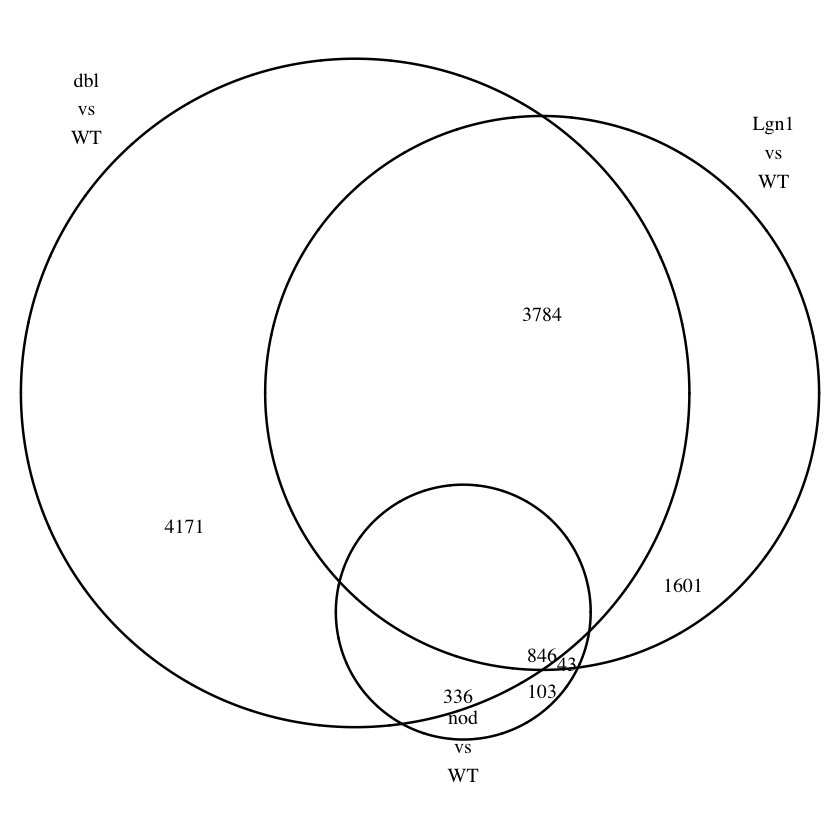

In [47]:
#make a three-way venndiagram
library(VennDiagram)

overrideTriple=T #required by VennDiagram to scale area to size of list
draw.triple.venn(  length(dblWT_DEG),
                   length(LgnWT_DEG), 
                   length(nodWT_DEG),
                   length(intersect(dblWT_DEG, LgnWT_DEG)),
                   length(intersect(LgnWT_DEG, nodWT_DEG)),
                   length(intersect(dblWT_DEG, nodWT_DEG)),
                   length(intersect(intersect(dblWT_DEG, LgnWT_DEG), nodWT_DEG)),
                   category = c("dbl\nvs\nWT","Lgn1\nvs\nWT", "nod\nvs\nWT"), 
                   euler.d=T, scaled=T)

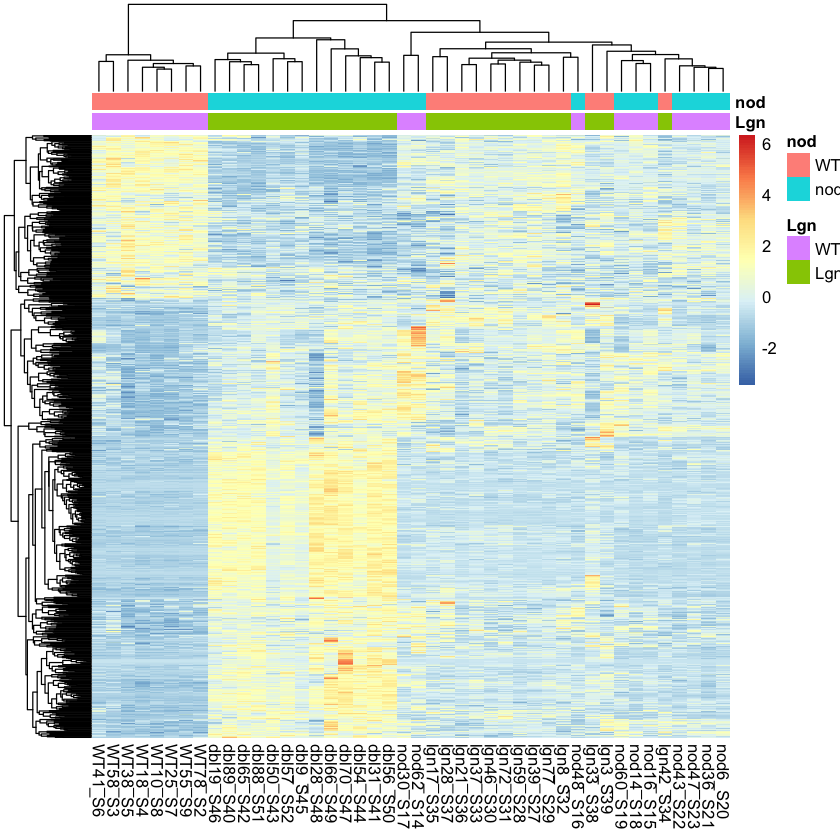

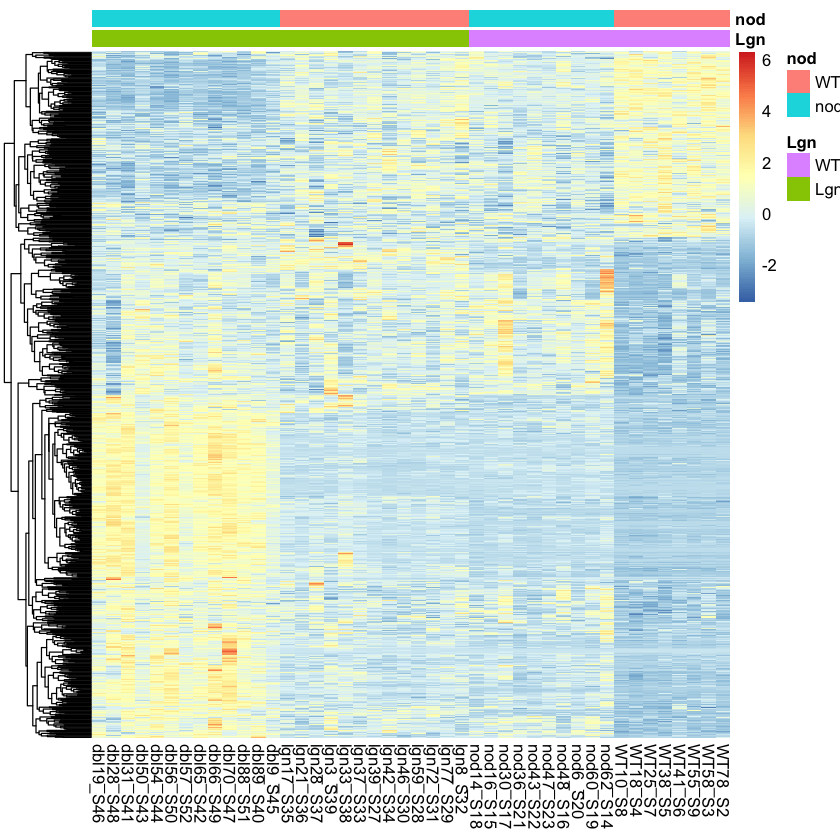

In [48]:
# heatmap of intersect transcripts
# are genes co-differential, or unique to each

library("pheatmap")

# get plot data from the overall FPKM
plot_data <- FPKM[intersect(intersect(dblWT_DEG, LgnWT_DEG), nodWT_DEG),]

df <- as.data.frame(colData(dds_drop)[,c("Lgn","nod")])

pheatmap(t(scale(t(plot_data))), cluster_rows=TRUE, 
         show_rownames=FALSE, show_colnames=TRUE,
         cluster_cols=TRUE, annotation_col=df)

pheatmap(t(scale(t(plot_data))), cluster_rows=TRUE, 
         show_rownames=FALSE, show_colnames=TRUE,
         cluster_cols=FALSE, annotation_col=df)

# Discussion  
What other comparisons can we make?  
What else can we do to make sense of these DEG?  

In [49]:
# what genes are DEG v WT in all

length(intersect(intersect(nodWT_DEG, dblWT_DEG), LgnWT_DEG))

write.table(intersect(intersect(nodWT_DEG, dblWT_DEG), LgnWT_DEG),
           file = "./DESeq2/dblLgnnod_shared_genes.RMoutliers.13S.5C.txt",
           quote = F, sep = "\t")

[1] 846

In [50]:
# what genes are unique to double?

length(setdiff(setdiff(dblWT_DEG, LgnWT_DEG), nodWT_DEG))

write.table(x = setdiff(setdiff(dblWT_DEG, LgnWT_DEG), nodWT_DEG), 
            file = "./DESeq2/dbl_unique_genes.RMoutliers.13S.5C.txt",
            quote = F, sep ="\t")

[1] 4171

In [51]:
#what genes are unique to lgn and nod but not double?

length(setdiff(intersect(nodWT_DEG, LgnWT_DEG), dblWT_DEG))

write.table(x = setdiff(intersect(nodWT_DEG, LgnWT_DEG), dblWT_DEG),
           file = "./DESeq2/Lgnnod_not_double_genes.13S.5C.txt",
           quote = F, sep = "\t")

[1] 43

In [52]:
#what genes are unique to Lgn?

length(setdiff(setdiff(LgnWT_DEG, dblWT_DEG), nodWT_DEG))

write.table(x = setdiff(setdiff(LgnWT_DEG, dblWT_DEG), nodWT_DEG), 
            file = "./DESeq2/Lgn_unique_genes.RMoutliers.13S.5C.txt",
            quote = F, sep ="\t")

[1] 1601

In [53]:
#what genes are unique to nod?

length(setdiff(setdiff(nodWT_DEG, dblWT_DEG), LgnWT_DEG))

write.table(x = setdiff(setdiff(nodWT_DEG, dblWT_DEG), LgnWT_DEG), 
            file = "./DESeq2/nod_unique_genes.RMoutliers.13S.5C.txt",
            quote = F, sep ="\t")

[1] 103

## Lets use Agrigo2 to check for Gene Ontology enrichment!
check out the tools at http://systemsbiology.cau.edu.cn/agriGOv2/  
calculate the SEA -- gene set enrichment for each mutant's unique DEG   
http://systemsbiology.cau.edu.cn/agriGOv2/classification_analysis.php?category=Plant&&family=Poaceae

# What else can we do with expression data?  
Let's try some machine learning  
We will make inference trees to classify mutant type by RNAseq

In [54]:
### try a random forest walk? 
#did you bring your boots?

require(randomForest)

Loading required package: randomForest
Warning message:
“package ‘randomForest’ was built under R version 3.4.4”randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:Biobase’:

    combine

The following object is masked from ‘package:BiocGenerics’:

    combine



In [55]:
# there are some random features to randomForest
# we can use a 'random seed' to make the random features reproducible
# you may use any seed you like, but for this example let's use the same one
set.seed(1234)

In [ ]:
# lets try making a model
# we will predict FPKM (x)
# using genotype (y)
# and a small number of decision trees (ntree)

In [60]:
# x
head (FPKM)

dbl19_S46 dbl28_S48 dbl31_S41 dbl50_S43 dbl54_S44  dbl56_S50
GRMZM2G059865    71.043567 63.867580 55.812321 70.074839 58.8407244 55.935982
GRMZM5G888250     9.415799  4.048901  5.982226  9.399094  4.7519816  9.889867
GRMZM2G093344     1.523144  2.944656  2.430279  2.349773  0.9503963  1.780176
GRMZM5G809743     9.436313 21.321487 12.739926 11.646015 13.7631467 13.479522
GRMZM5G833153    10.966636 17.545239 16.176937 16.918368 18.4693684 12.474419
AC177838.2_FG015  4.295149  4.995196  5.557244  3.589181  4.6063270  2.300815
                 dbl57_S52 dbl65_S42 dbl66_S49 dbl70_S47 ⋯ nod60_S19 nod62_S14
GRMZM2G059865    67.250536 63.402847 56.842000 60.817282 ⋯ 72.640036 71.167770
GRMZM5G888250     3.648548  7.798303 10.921149  5.152199 ⋯  7.264874 10.971986
GRMZM2G093344     2.964445  2.112040  2.730287  3.381130 ⋯  2.335138  2.133442
GRMZM5G809743    11.655085 26.571994 17.365975 10.972275 ⋯ 22.102129  2.077001
GRMZM5G833153    14.046911 20.253925 15.483762 13.932404 ⋯ 19.027050  8.493130
AC177838.2_FG015  3.241989  5.879436  3.293547  5.618561 ⋯  4.694797  2.363484
                 WT10_S8   WT18_S4    WT25_S7   WT38_S5  WT41_S6   WT55_S9  
GRMZM2G059865    95.879469 100.226023 89.092697 85.05722 88.625578 82.921249
GRMZM5G888250    11.289747  14.331842 16.448432 10.10277 11.970071  6.841822
GRMZM2G093344     1.963434   4.200712  2.436805  4.04111  3.222712  3.420911
GRMZM5G809743     8.362775  26.943130 13.492678 14.45819  8.628000 15.299075
GRMZM5G833153    15.838369  17.033476 19.210145 23.11515 10.803757 11.916174
AC177838.2_FG015  5.392548   5.748642  4.724227  7.05104  3.272690  4.974084
                 WT58_S3   WT78_S2  
GRMZM2G059865    90.864842 90.778483
GRMZM5G888250    13.841072 12.176997
GRMZM2G093344     2.018490  5.137171
GRMZM5G809743     8.842907 18.152746
GRMZM5G833153    11.841806 15.906203
AC177838.2_FG015  2.981517  4.918232

In [67]:
# y
colData(dds_drop)$genotype

[1] dbl dbl dbl dbl dbl dbl dbl dbl dbl dbl dbl dbl dbl Lgn Lgn Lgn Lgn Lgn Lgn
[20] Lgn Lgn Lgn Lgn Lgn Lgn Lgn nod nod nod nod nod nod nod nod nod nod WT  WT 
[39] WT  WT  WT  WT  WT  WT 
Levels: WT dbl Lgn nod

In [76]:
# lets try making a model
# we will predict FPKM (x)
# using genotype (y)
# and a small number of decision trees (ntree)
rf.10 <- randomForest(x=t(FPKM), y=colData(dds_drop)$genotype, ntree=10)

In [77]:
print(rf.10)


Call:
 randomForest(x = t(FPKM), y = colData(dds_drop)$genotype, ntree = 10) 
               Type of random forest: classification
                     Number of trees: 10
No. of variables tried at each split: 149

        OOB estimate of  error rate: 11.63%
Confusion matrix:
    WT dbl Lgn nod class.error
WT   7   0   1   0   0.1250000
dbl  0  11   2   0   0.1538462
Lgn  0   0  12   0   0.0000000
nod  1   0   1   8   0.2000000


In [56]:
# to create an effective model, we can emprically determine the optimum:
# 1) number of decision trees to use
# 2) number of paramaters (--genes in our case--) available to each tree

In [79]:
# test a range of tree numbers
rf.10 <- randomForest(x=t(FPKM), y=colData(dds_drop)$genotype, ntree=10)
rf.50 <- randomForest(x=t(FPKM), y=colData(dds_drop)$genotype, ntree=50)
rf.100 <- randomForest(x=t(FPKM), y=colData(dds_drop)$genotype, ntree=100)
rf.500 <- randomForest(x=t(FPKM), y=colData(dds_drop)$genotype, ntree=500)
rf.1000 <- randomForest(x=t(FPKM), y=colData(dds_drop)$genotype, ntree=1000)


In [102]:
print(rf.10)
print(rf.50)
print(rf.100)
print(rf.500)
print(rf.1000)


Call:
 randomForest(x = t(FPKM), y = colData(dds_drop)$genotype, ntree = 10) 
               Type of random forest: classification
                     Number of trees: 10
No. of variables tried at each split: 149

        OOB estimate of  error rate: 30.95%
Confusion matrix:
    WT dbl Lgn nod class.error
WT   5   0   1   2   0.3750000
dbl  0  10   2   0   0.1666667
Lgn  1   1   9   1   0.2500000
nod  1   2   2   5   0.5000000

Call:
 randomForest(x = t(FPKM), y = colData(dds_drop)$genotype, ntree = 50,      importance = T) 
               Type of random forest: classification
                     Number of trees: 50
No. of variables tried at each split: 149

        OOB estimate of  error rate: 6.82%
Confusion matrix:
    WT dbl Lgn nod class.error
WT   8   0   0   0         0.0
dbl  0  13   0   0         0.0
Lgn  0   0  13   0         0.0
nod  2   0   1   7         0.3

Call:
 randomForest(x = t(FPKM), y = colData(dds_drop)$genotype, ntree = 100) 
               Type of random fore

In [81]:
# 50 trees is looking pretty sweet
# can you find a lower tree number that does as well?

rf.10 <- randomForest(x=t(FPKM), y=colData(dds_drop)$genotype, ntree=10)
rf.20 <- randomForest(x=t(FPKM), y=colData(dds_drop)$genotype, ntree=20)
rf.30 <- randomForest(x=t(FPKM), y=colData(dds_drop)$genotype, ntree=30)
rf.40 <- randomForest(x=t(FPKM), y=colData(dds_drop)$genotype, ntree=40)
rf.50 <- randomForest(x=t(FPKM), y=colData(dds_drop)$genotype, ntree=50)


In [82]:
print (rf.10)
print (rf.20)
print (rf.30)
print (rf.40)
print (rf.50)


Call:
 randomForest(x = t(FPKM), y = colData(dds_drop)$genotype, ntree = 10) 
               Type of random forest: classification
                     Number of trees: 10
No. of variables tried at each split: 149

        OOB estimate of  error rate: 30.95%
Confusion matrix:
    WT dbl Lgn nod class.error
WT   5   0   1   2   0.3750000
dbl  0  10   2   0   0.1666667
Lgn  1   1   9   1   0.2500000
nod  1   2   2   5   0.5000000

Call:
 randomForest(x = t(FPKM), y = colData(dds_drop)$genotype, ntree = 20) 
               Type of random forest: classification
                     Number of trees: 20
No. of variables tried at each split: 149

        OOB estimate of  error rate: 9.09%
Confusion matrix:
    WT dbl Lgn nod class.error
WT   7   0   0   1  0.12500000
dbl  0  12   1   0  0.07692308
Lgn  0   1  12   0  0.07692308
nod  1   0   0   9  0.10000000

Call:
 randomForest(x = t(FPKM), y = colData(dds_drop)$genotype, ntree = 30) 
               Type of random forest: classification
   

mtry = 149  OOB error = 0% 
Searching left ...
mtry = 30 	OOB error = 13.64% 
-Inf 1 
Searching right ...
mtry = 745 	OOB error = 2.27% 
-Inf 1 
        mtry   OOBError
30.OOB    30 0.13636364
149.OOB  149 0.00000000
745.OOB  745 0.02272727


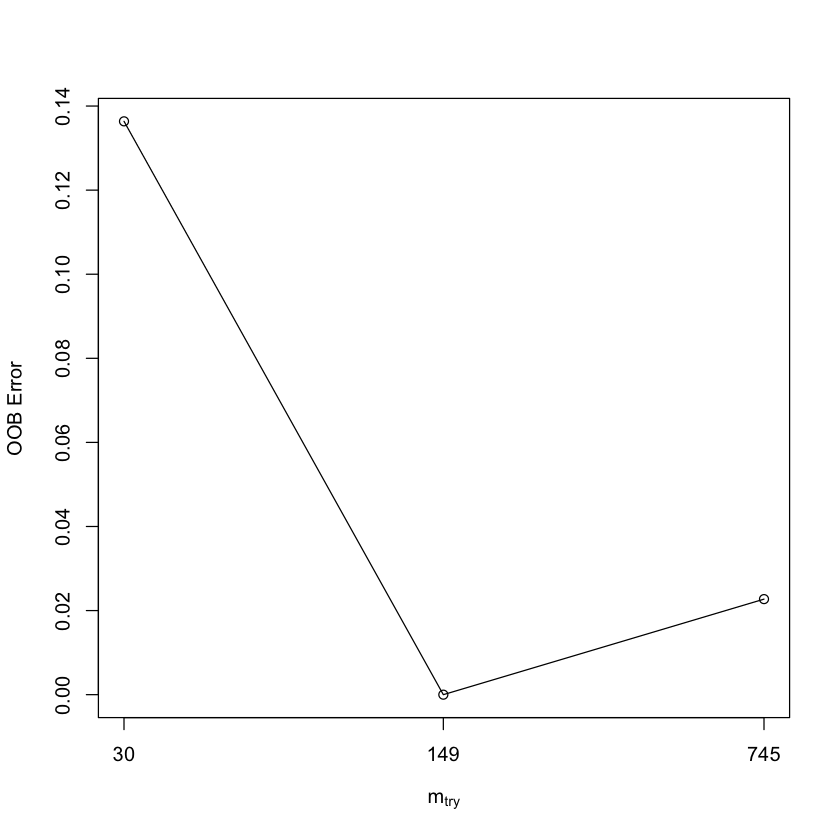

In [93]:
# now to refine the number of genes considered in each tree
# the randomForest package comes with a built in function that will try to optimize
# by trying mtry values higher or lower than the starting one, and looking for improvement
# when it can't improve by calculating a new mtry tree, it stops
mtry <- tuneRF(x = t(FPKM), y = colData(dds_drop)$genotype, ntreeTry=50, mtryStart=149,
               stepFactor=5,improve=1, trace=TRUE, plot=TRUE) #increases/decreases by step factor and checks for improve %improvement
print(mtry)


In [96]:
# let's calculate the relative importance of all genes involved in making the decision tree

rf.50 <- randomForest(x=t(FPKM), y=colData(dds_drop)$genotype, ntree=50, importance=T)
print(rf.50)


Call:
 randomForest(x = t(FPKM), y = colData(dds_drop)$genotype, ntree = 50,      importance = T) 
               Type of random forest: classification
                     Number of trees: 50
No. of variables tried at each split: 149

        OOB estimate of  error rate: 6.82%
Confusion matrix:
    WT dbl Lgn nod class.error
WT   8   0   0   0         0.0
dbl  0  13   0   0         0.0
Lgn  0   0  13   0         0.0
nod  2   0   1   7         0.3


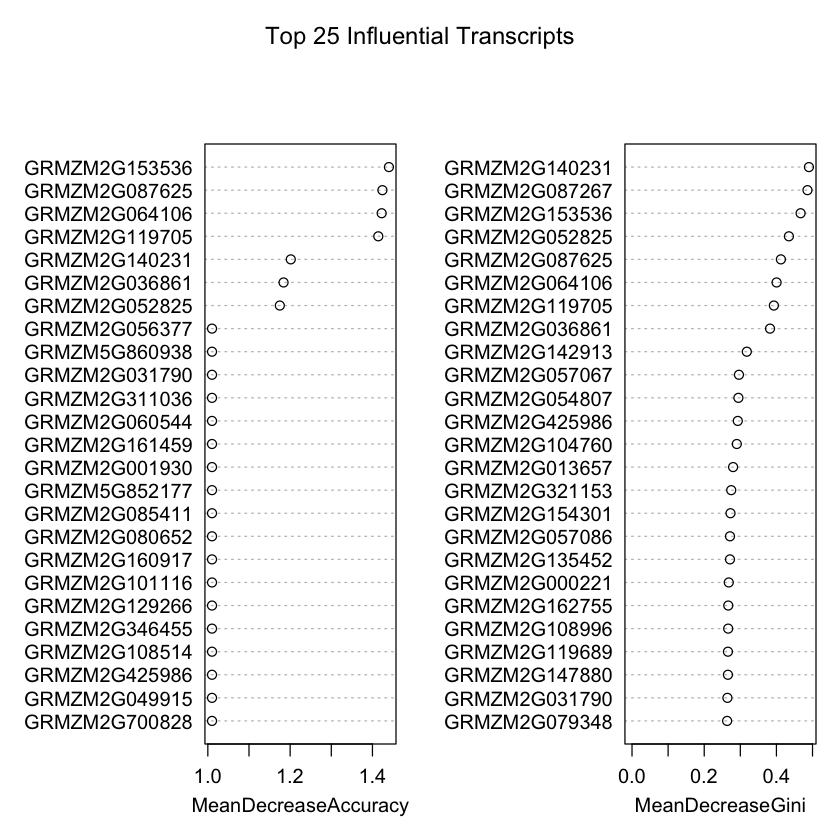

In [97]:
# plot importances

varImpPlot(rf.50, n.var=25, main="Top 25 Influential Transcripts")

In [99]:
#extract influence metrics from random forest generation
influence <- importance(rf.50)
#order by error and output
head(influence[order(influence[,6], decreasing=T),])
influence.order <- influence[order(influence[,6], decreasing=T),]
write.table(influence.order, 
            file="./DESeq2/randomForest_importance.13S.5C.txt", sep="\t", quote=F)

WT       dbl      Lgn       nod      MeanDecreaseAccuracy
GRMZM2G140231 1.010153 0.000000 1.3664626 1.010153 1.201540            
GRMZM2G087267 0.000000 0.000000 1.0101525 1.010153 1.010153            
GRMZM2G153536 1.366463 1.230915 1.2728909 1.285649 1.440046            
GRMZM2G052825 1.414214 0.000000 0.6350006 1.010153 1.174942            
GRMZM2G087625 1.010153 0.000000 1.4433757 1.443376 1.424208            
GRMZM2G064106 1.414214 0.000000 1.4433757 1.366463 1.422413            
              MeanDecreaseGini
GRMZM2G140231 0.4900369       
GRMZM2G087267 0.4860207       
GRMZM2G153536 0.4669986       
GRMZM2G052825 0.4345720       
GRMZM2G087625 0.4123665       
GRMZM2G064106 0.4004144

# Group project!  
Please find 2-3 collaborators.  
Name your group. Using the tools available to you,  
prepare analysis, figures, tables to address the following hypothesis:  
EVENS: Lgn and nod act in the same pathway  
ODDS: Lgn and nod act in different pathways  

Suggestions for additional anlysis: 
? Use AgriGO2 to determine enrichment in unique and shared DEG lists  
? Are any pathways over represented
? Look at the most informative genes from randomforest for each mutant
? How are informative genes expressed accross mutants?  
  Get creative!  
  
  ### take 20 mins and we will all share  
  ### best analysis and presentation gets a _special_ prize